In [32]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.cm as cm

In [2]:
# Import data from Travel Payouts and compiled airport codes
allprices_df=pd.read_csv('Output/AllPrices.csv')
domprices_df=allprices_df
airportcodes_df=pd.read_csv('Resources/airport-codes.csv')

In [3]:
# Drop any flights with 0 distance
allprices_df=allprices_df[allprices_df['Distance (Miles)']!=0]
# Normalize price by distance
allprices_df['Price per Mile']=allprices_df['Price (USD)']/allprices_df['Distance (Miles)']

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
# Compile the coordinates of all unique airports in the Travel Payouts tickets
codes=[]
lats=[]
longs=[]
rows=len(allprices_df)
for i in range(rows):
    row=allprices_df.iloc[i,:]
    if row['Origin'] not in codes:
        code=row['Origin']
#         print(code)
#       Find coordinates of origin city, stored as "long, lat""
        try:
            coords=list(airportcodes_df[airportcodes_df['iata_code'] == code]['coordinates'])[0].split(', ')
            lat=coords[1]
            long=coords[0]
        except:
            lat=float('nan')
            long=float('nan')
        codes.append(code)
        lats.append(lat)
        longs.append(long)
    if row['Destination'] not in codes:
        code=row['Destination']
#         print(code)
#       Find coordinates of origin city, stored as "long, lat"
        try:
            coords=list(airportcodes_df[airportcodes_df['iata_code'] == code]['coordinates'])[0].split(', ')
            lat=coords[1]
            long=coords[0]
        except:
            lat=float('nan')
            long=float('nan')
        codes.append(code)
        lats.append(lat)
        longs.append(long)
coords_df=pd.DataFrame({'Airport Code':codes, 'Lat':lats, 'Long':longs})
coords_df

,Airport Code,Lat,Long
0,ATL,33.63669967651367,-84.4281005859375
1,ORL,NaN,NaN
2,BWI,39.17539978,-76.66829681
3,FLL,26.072599411010742,-80.15270233154297
4,DFW,32.89680099487305,-97.03800201416016
5,HOU,29.64539909,-95.27890015
6,MIA,25.79319953918457,-80.29060363769531
7,CHI,NaN,NaN
8,RDU,35.877601623535156,-78.7874984741211
9,BOS,42.36429977,-71.00520325


In [5]:
# Add latitudes and longitudes to ticket data
rows=len(allprices_df)
lats1=[]
longs1=[]
lats2=[]
longs2=[]
for i in range(rows):
    row=allprices_df.iloc[i,:]
#   Add coordinates of origin city
    origin=row['Origin']
    print('Ticket '+ str(i))
    print(origin)
    origincoords=coords_df[coords_df['Airport Code']==origin]
    lat1=list(origincoords['Lat'])[0]
    long1=list(origincoords['Long'])[0]
    lats1.append(float(lat1))
    longs1.append(float(long1))
#   Add coordinates of destination city
    destination=row['Destination']
    print(destination)
    destinationcoords=coords_df[coords_df['Airport Code']==destination]
    lat2=list(destinationcoords['Lat'])[0]
    long2=list(destinationcoords['Long'])[0]
    lats2.append(float(lat2))
    longs2.append(float(long2))
allprices_df['lat1']=lats1
allprices_df['long1']=longs1
allprices_df['lat2']=lats2
allprices_df['long2']=longs2
allprices_df=allprices_df.drop(columns=['Unnamed: 0'])

Ticket 0
ATL
ORL
Ticket 1
ATL
BWI
Ticket 2
ATL
FLL
Ticket 3
ATL
DFW
Ticket 4
ATL
HOU
Ticket 5
ATL
MIA
Ticket 6
ATL
CHI
Ticket 7
ATL
RDU
Ticket 8
ATL
BOS
Ticket 9
ATL
TPA
Ticket 10
ATL
NYC
Ticket 11
ATL
PIT
Ticket 12
ATL
BNA
Ticket 13
ATL
DEN
Ticket 14
ATL
MSY
Ticket 15
ATL
RIC
Ticket 16
ATL
DTT
Ticket 17
ATL
COS
Ticket 18
ATL
LAS
Ticket 19
ATL
HOT
Ticket 20
ATL
LAX
Ticket 21
ATL
JAX
Ticket 22
ATL
MEM
Ticket 23
ATL
SJU
Ticket 24
ATL
AUS
Ticket 25
ATL
SEA
Ticket 26
ATL
ISP
Ticket 27
ATL
SAN
Ticket 28
ATL
WAS
Ticket 29
ATL
JAN
Ticket 30
ATL
GUA
Ticket 31
ATL
CVG
Ticket 32
ATL
ILM
Ticket 33
ATL
MEX
Ticket 34
ATL
CUN
Ticket 35
ATL
SNA
Ticket 36
ATL
GEG
Ticket 37
ATL
SDQ
Ticket 38
ATL
PNS
Ticket 39
ATL
KIN
Ticket 40
ATL
GDL
Ticket 41
ATL
LEX
Ticket 42
ATL
MKE
Ticket 43
ATL
BOG
Ticket 44
ATL
PHX
Ticket 45
ATL
MSP
Ticket 46
ATL
PAR
Ticket 47
ATL
VSA
Ticket 48
ATL
HNL
Ticket 49
ATL
PHF
Ticket 50
ATL
SLP
Ticket 51
ATL
QRO
Ticket 52
ATL
PHL
Ticket 53
ATL
BCN
Ticket 54
ATL
MDE
Ticket 55
ATL
NCL
Ti

Ticket 505
DEN
AUS
Ticket 506
DEN
MKC
Ticket 507
DEN
SJC
Ticket 508
DEN
ICT
Ticket 509
DEN
SFO
Ticket 510
DEN
WAS
Ticket 511
DEN
SEA
Ticket 512
DEN
FSD
Ticket 513
DEN
TPA
Ticket 514
DEN
PHL
Ticket 515
DEN
ATL
Ticket 516
DEN
PHX
Ticket 517
DEN
RDU
Ticket 518
DEN
RIC
Ticket 519
DEN
OAK
Ticket 520
DEN
OKC
Ticket 521
DEN
MKE
Ticket 522
DEN
CHI
Ticket 523
DEN
BOS
Ticket 524
DEN
LAR
Ticket 525
DEN
AVP
Ticket 526
DEN
CMH
Ticket 527
DEN
CVG
Ticket 528
DEN
PIT
Ticket 529
DEN
HAR
Ticket 530
DEN
SAC
Ticket 531
DEN
SAN
Ticket 532
DEN
CAK
Ticket 533
DEN
MEX
Ticket 534
DEN
YYC
Ticket 535
DEN
CLT
Ticket 536
DEN
SJU
Ticket 537
DEN
IND
Ticket 538
DEN
SNA
Ticket 539
DEN
BGR
Ticket 540
DEN
SIT
Ticket 541
DEN
ANC
Ticket 542
DEN
YTO
Ticket 543
DEN
GDL
Ticket 544
DEN
CUN
Ticket 545
DEN
BFD
Ticket 546
DEN
FKL
Ticket 547
DEN
MGW
Ticket 548
DEN
AOO
Ticket 549
DEN
BJX
Ticket 550
DEN
GSP
Ticket 551
DEN
PWM
Ticket 552
DEN
LNS
Ticket 553
DEN
HGR
Ticket 554
DEN
SJD
Ticket 555
DEN
SJO
Ticket 556
DEN
DUJ
Ticket 557
D

Ticket 976
SFO
NAN
Ticket 977
SFO
MAA
Ticket 978
SFO
POA
Ticket 979
SFO
BOM
Ticket 980
SFO
DXB
Ticket 981
SFO
SVX
Ticket 982
SFO
SEL
Ticket 983
SFO
FRU
Ticket 984
SFO
TPE
Ticket 985
SFO
CAI
Ticket 986
SFO
OZH
Ticket 987
SFO
FOR
Ticket 988
SFO
SIN
Ticket 989
SFO
HYD
Ticket 990
SFO
BSB
Ticket 991
SFO
CPT
Ticket 992
SFO
BUE
Ticket 993
SFO
SYD
Ticket 994
SFO
RUH
Ticket 995
SFO
TAS
Ticket 996
SFO
BLR
Ticket 997
SFO
NAG
Ticket 998
SFO
SHJ
Ticket 999
SFO
SOQ
Ticket 1000
SFO
HOF
Ticket 1001
LAS
LAX
Ticket 1002
LAS
OAK
Ticket 1003
LAS
SFO
Ticket 1004
LAS
SAN
Ticket 1005
LAS
DEN
Ticket 1006
LAS
DFW
Ticket 1007
LAS
PDX
Ticket 1008
LAS
YYC
Ticket 1009
LAS
SEA
Ticket 1010
LAS
BIL
Ticket 1011
LAS
MEM
Ticket 1012
LAS
OMA
Ticket 1013
LAS
SAT
Ticket 1014
LAS
AUS
Ticket 1015
LAS
CHI
Ticket 1016
LAS
PHX
Ticket 1017
LAS
IND
Ticket 1018
LAS
HOU
Ticket 1019
LAS
MEX
Ticket 1020
LAS
SLC
Ticket 1021
LAS
RNO
Ticket 1022
LAS
PIT
Ticket 1023
LAS
BWI
Ticket 1024
LAS
CLE
Ticket 1025
LAS
ORL
Ticket 1026
LAS
MSY
Tick

Ticket 1409
EWR
ATL
Ticket 1410
EWR
WAS
Ticket 1411
EWR
PBI
Ticket 1412
EWR
SAN
Ticket 1413
EWR
RDU
Ticket 1414
EWR
BWI
Ticket 1415
EWR
BUF
Ticket 1416
EWR
IND
Ticket 1417
EWR
PIT
Ticket 1418
EWR
CLE
Ticket 1419
EWR
AUS
Ticket 1420
EWR
LAS
Ticket 1421
EWR
LAX
Ticket 1422
EWR
BQN
Ticket 1423
EWR
JAX
Ticket 1424
EWR
BDA
Ticket 1425
EWR
LON
Ticket 1426
EWR
HOU
Ticket 1427
EWR
DFW
Ticket 1428
EWR
MSP
Ticket 1429
EWR
FMY
Ticket 1430
EWR
PTY
Ticket 1431
EWR
MKE
Ticket 1432
EWR
SAP
Ticket 1433
EWR
MHT
Ticket 1434
EWR
PAR
Ticket 1435
EWR
STL
Ticket 1436
EWR
CMH
Ticket 1437
EWR
SEA
Ticket 1438
EWR
CUN
Ticket 1439
EWR
BGR
Ticket 1440
EWR
SJU
Ticket 1441
EWR
TPA
Ticket 1442
EWR
SDQ
Ticket 1443
EWR
PAP
Ticket 1444
EWR
SRQ
Ticket 1445
EWR
MSY
Ticket 1446
EWR
SFO
Ticket 1447
EWR
KIN
Ticket 1448
EWR
ONT
Ticket 1449
EWR
MDE
Ticket 1450
EWR
MKC
Ticket 1451
EWR
YHZ
Ticket 1452
EWR
YVR
Ticket 1453
EWR
MEM
Ticket 1454
EWR
CHS
Ticket 1455
EWR
PHX
Ticket 1456
EWR
OAK
Ticket 1457
EWR
HAV
Ticket 1458
EWR
BOG


ZRH
Ticket 1855
PHL
LOS
Ticket 1856
PHL
TAS
Ticket 1857
PHL
KTM
Ticket 1858
PHL
BLR
Ticket 1859
BOS
BWI
Ticket 1860
BOS
PIT
Ticket 1861
BOS
FMY
Ticket 1862
BOS
FLL
Ticket 1863
BOS
ATL
Ticket 1864
BOS
CHI
Ticket 1865
BOS
NYC
Ticket 1866
BOS
YMQ
Ticket 1867
BOS
WAS
Ticket 1868
BOS
HOU
Ticket 1869
BOS
GSO
Ticket 1870
BOS
TPA
Ticket 1871
BOS
LAS
Ticket 1872
BOS
LAX
Ticket 1873
BOS
OAK
Ticket 1874
BOS
SAV
Ticket 1875
BOS
PHL
Ticket 1876
BOS
SJU
Ticket 1877
BOS
SJO
Ticket 1878
BOS
CVG
Ticket 1879
BOS
MIA
Ticket 1880
BOS
BQN
Ticket 1881
BOS
AVP
Ticket 1882
BOS
SJC
Ticket 1883
BOS
MSY
Ticket 1884
BOS
OAJ
Ticket 1885
BOS
SFO
Ticket 1886
BOS
ZSH
Ticket 1887
BOS
BNA
Ticket 1888
BOS
STI
Ticket 1889
BOS
DEN
Ticket 1890
BOS
CLT
Ticket 1891
BOS
BDL
Ticket 1892
BOS
PHX
Ticket 1893
BOS
SEA
Ticket 1894
BOS
HGR
Ticket 1895
BOS
MBJ
Ticket 1896
BOS
YYJ
Ticket 1897
BOS
LON
Ticket 1898
BOS
FKL
Ticket 1899
BOS
PAP
Ticket 1900
BOS
ORF
Ticket 1901
BOS
YXU
Ticket 1902
BOS
MGW
Ticket 1903
BOS
MHT
Ticket 1904
BOS


CVG
Ticket 2318
BWI
DEN
Ticket 2319
BWI
ORL
Ticket 2320
BWI
FLL
Ticket 2321
BWI
DFW
Ticket 2322
BWI
LAX
Ticket 2323
BWI
TPA
Ticket 2324
BWI
MSP
Ticket 2325
BWI
NYC
Ticket 2326
BWI
ATL
Ticket 2327
BWI
FMY
Ticket 2328
BWI
DTT
Ticket 2329
BWI
PGV
Ticket 2330
BWI
LAS
Ticket 2331
BWI
HOU
Ticket 2332
BWI
BNA
Ticket 2333
BWI
IND
Ticket 2334
BWI
ORF
Ticket 2335
BWI
GSP
Ticket 2336
BWI
PHL
Ticket 2337
BWI
ROC
Ticket 2338
BWI
BDL
Ticket 2339
BWI
CLT
Ticket 2340
BWI
ALB
Ticket 2341
BWI
GRI
Ticket 2342
BWI
MIA
Ticket 2343
BWI
MSY
Ticket 2344
BWI
PBI
Ticket 2345
BWI
MEM
Ticket 2346
BWI
SAT
Ticket 2347
BWI
DAB
Ticket 2348
BWI
SWF
Ticket 2349
BWI
SAN
Ticket 2350
BWI
LBE
Ticket 2351
BWI
MKC
Ticket 2352
BWI
YOW
Ticket 2353
BWI
STL
Ticket 2354
BWI
LAN
Ticket 2355
BWI
PVD
Ticket 2356
BWI
PDX
Ticket 2357
BWI
SLC
Ticket 2358
BWI
BHM
Ticket 2359
BWI
PNS
Ticket 2360
BWI
CHS
Ticket 2361
BWI
SFO
Ticket 2362
BWI
COS
Ticket 2363
BWI
PAP
Ticket 2364
BWI
REK
Ticket 2365
BWI
SRQ
Ticket 2366
BWI
SEA
Ticket 2367
BWI


LIT
Ticket 2794
MDW
GDL
Ticket 2795
MDW
DGO
Ticket 2796
MDW
JAN
Ticket 2797
MDW
LON
Ticket 2798
MDW
VLD
Ticket 2799
MDW
DAY
Ticket 2800
MDW
FMY
Ticket 2801
MDW
SAN
Ticket 2802
MDW
PVR
Ticket 2803
MDW
YVR
Ticket 2804
MDW
SAC
Ticket 2805
MDW
BQN
Ticket 2806
MDW
LEX
Ticket 2807
MDW
YQX
Ticket 2808
MDW
ZIH
Ticket 2809
MDW
IEV
Ticket 2810
MDW
NAS
Ticket 2811
MDW
FRA
Ticket 2812
MDW
HAR
Ticket 2813
MDW
OAJ
Ticket 2814
MDW
PAR
Ticket 2815
MDW
ZRH
Ticket 2816
MDW
ROM
Ticket 2817
MDW
DEL
Ticket 2818
MDW
BIS
Ticket 2819
MDW
TLH
Ticket 2820
MDW
DUB
Ticket 2821
MDW
VCE
Ticket 2822
MDW
BRU
Ticket 2823
MDW
PMI
Ticket 2824
MDW
QRO
Ticket 2825
MDW
MGM
Ticket 2826
MDW
BCN
Ticket 2827
MDW
SOF
Ticket 2828
MDW
MNL
Ticket 2829
MDW
ATH
Ticket 2830
MDW
HKG
Ticket 2831
MDW
BEG
Ticket 2832
MDW
BOM
Ticket 2833
MDW
STR
Ticket 2834
MDW
GUA
Ticket 2835
MDW
TCI
Ticket 2836
MDW
LIM
Ticket 2837
MDW
WAW
Ticket 2838
MDW
DXB
Ticket 2839
MDW
BLR
Ticket 2840
MDW
MAA
Ticket 2841
MDW
JED
Ticket 2842
MDW
MSQ
Ticket 2843
MDW


OAK
BOM
Ticket 3235
OAK
BUE
Ticket 3236
OAK
POA
Ticket 3237
OAK
RIO
Ticket 3238
OAK
FOR
Ticket 3239
OAK
BLR
Ticket 3240
OAK
HYD
Ticket 3241
OAK
BSB
Ticket 3242
OAK
SIN
Ticket 3243
OAK
SBZ
Ticket 3244
OAK
BKK
Ticket 3245
OAK
SVX
Ticket 3246
CLE
ORL
Ticket 3247
CLE
LAX
Ticket 3248
CLE
TPA
Ticket 3249
CLE
MYR
Ticket 3250
CLE
SAN
Ticket 3251
CLE
NYC
Ticket 3252
CLE
LAS
Ticket 3253
CLE
MIA
Ticket 3254
CLE
FLL
Ticket 3255
CLE
HOU
Ticket 3256
CLE
OAK
Ticket 3257
CLE
MSP
Ticket 3258
CLE
MSY
Ticket 3259
CLE
ISP
Ticket 3260
CLE
CLT
Ticket 3261
CLE
CHI
Ticket 3262
CLE
MEX
Ticket 3263
CLE
PHX
Ticket 3264
CLE
PIT
Ticket 3265
CLE
HNL
Ticket 3266
CLE
ONT
Ticket 3267
CLE
OGG
Ticket 3268
CLE
IST
Ticket 3269
CLE
REK
Ticket 3270
CLE
JHM
Ticket 3271
CLE
OVB
Ticket 3272
RDU
PIT
Ticket 3273
RDU
BWI
Ticket 3274
RDU
ORL
Ticket 3275
RDU
WAS
Ticket 3276
RDU
TPA
Ticket 3277
RDU
NYC
Ticket 3278
RDU
DEN
Ticket 3279
RDU
ATL
Ticket 3280
RDU
HAR
Ticket 3281
RDU
ISP
Ticket 3282
RDU
FLL
Ticket 3283
RDU
PHL
Ticket 3284


Ticket 3730
PIT
DUB
Ticket 3731
PIT
TVC
Ticket 3732
PIT
ELP
Ticket 3733
PIT
LAN
Ticket 3734
PIT
HAR
Ticket 3735
PIT
BGR
Ticket 3736
PIT
SCE
Ticket 3737
PIT
CLE
Ticket 3738
PIT
MBJ
Ticket 3739
PIT
MCW
Ticket 3740
PIT
ROA
Ticket 3741
PIT
MEM
Ticket 3742
PIT
SWF
Ticket 3743
PIT
RIC
Ticket 3744
PIT
BCN
Ticket 3745
PIT
CMH
Ticket 3746
PIT
ILG
Ticket 3747
PIT
BTV
Ticket 3748
PIT
ERI
Ticket 3749
PIT
JAN
Ticket 3750
PIT
HNL
Ticket 3751
PIT
GCN
Ticket 3752
PIT
PRG
Ticket 3753
PIT
IEV
Ticket 3754
PIT
LFT
Ticket 3755
PIT
IST
Ticket 3756
PIT
MNL
Ticket 3757
PIT
MAA
Ticket 3758
PIT
PGH
Ticket 3759
PIT
DAC
Ticket 3760
PIT
BAL
Ticket 3761
PIT
TEB
Ticket 3762
SAT
DEN
Ticket 3763
SAT
COS
Ticket 3764
SAT
MEM
Ticket 3765
SAT
LAS
Ticket 3766
SAT
MTY
Ticket 3767
SAT
DFW
Ticket 3768
SAT
RIC
Ticket 3769
SAT
PDX
Ticket 3770
SAT
PIT
Ticket 3771
SAT
BWI
Ticket 3772
SAT
OKC
Ticket 3773
SAT
SLC
Ticket 3774
SAT
GDL
Ticket 3775
SAT
WAS
Ticket 3776
SAT
ONT
Ticket 3777
SAT
BDL
Ticket 3778
SAT
ACA
Ticket 3779
SAT
ABQ


Ticket 4147
ORD
SVX
Ticket 4148
ORD
CAS
Ticket 4149
ORD
DEL
Ticket 4150
ORD
SEL
Ticket 4151
ORD
MAA
Ticket 4152
ORD
WNP
Ticket 4153
ORD
LHE
Ticket 4154
ORD
TUG
Ticket 4155
ORD
ULN
Ticket 4156
ORD
TYO
Ticket 4157
ORD
JED
Ticket 4158
ORD
RIO
Ticket 4159
ORD
COK
Ticket 4160
ORD
LED
Ticket 4161
ORD
AMD
Ticket 4162
ORD
KRT
Ticket 4163
ORD
LOS
Ticket 4164
LAX
LAS
Ticket 4165
LAX
SFO
Ticket 4166
LAX
HOU
Ticket 4167
LAX
MSP
Ticket 4168
LAX
OAK
Ticket 4169
LAX
PIT
Ticket 4170
LAX
GDL
Ticket 4171
LAX
PHX
Ticket 4172
LAX
PDX
Ticket 4173
LAX
DFW
Ticket 4174
LAX
CHI
Ticket 4175
LAX
MEM
Ticket 4176
LAX
CLE
Ticket 4177
LAX
BWI
Ticket 4178
LAX
SAN
Ticket 4179
LAX
SJC
Ticket 4180
LAX
DTT
Ticket 4181
LAX
DEN
Ticket 4182
LAX
SEA
Ticket 4183
LAX
MSY
Ticket 4184
LAX
NYC
Ticket 4185
LAX
ELP
Ticket 4186
LAX
PHL
Ticket 4187
LAX
MFR
Ticket 4188
LAX
RNO
Ticket 4189
LAX
AUS
Ticket 4190
LAX
ORL
Ticket 4191
LAX
BOS
Ticket 4192
LAX
FLL
Ticket 4193
LAX
BOI
Ticket 4194
LAX
MEX
Ticket 4195
LAX
SAT
Ticket 4196
LAX
YVR


JFK
LIM
Ticket 4649
JFK
LED
Ticket 4650
JFK
BEG
Ticket 4651
JFK
PTY
Ticket 4652
JFK
SLC
Ticket 4653
JFK
BOI
Ticket 4654
JFK
VRA
Ticket 4655
JFK
TBS
Ticket 4656
JFK
PTP
Ticket 4657
JFK
SZZ
Ticket 4658
JFK
SAL
Ticket 4659
JFK
AYT
Ticket 4660
JFK
SVX
Ticket 4661
JFK
HRK
Ticket 4662
JFK
DXB
Ticket 4663
JFK
KIV
Ticket 4664
JFK
AXM
Ticket 4665
JFK
HNL
Ticket 4666
JFK
LWO
Ticket 4667
JFK
EVN
Ticket 4668
JFK
MKC
Ticket 4669
JFK
DKR
Ticket 4670
JFK
ODS
Ticket 4671
JFK
BEY
Ticket 4672
JFK
GOJ
Ticket 4673
JFK
SAT
Ticket 4674
JFK
KRR
Ticket 4675
JFK
KZN
Ticket 4676
JFK
MCX
Ticket 4677
JFK
STW
Ticket 4678
JFK
ALA
Ticket 4679
JFK
CGN
Ticket 4680
JFK
TAS
Ticket 4681
JFK
BKK
Ticket 4682
JFK
BUS
Ticket 4683
JFK
SHA
Ticket 4684
JFK
BOM
Ticket 4685
JFK
SGN
Ticket 4686
JFK
SIN
Ticket 4687
JFK
DEL
Ticket 4688
JFK
SIT
Ticket 4689
JFK
INN
Ticket 4690
JFK
CEK
Ticket 4691
JFK
MHK
Ticket 4692
JFK
CAI
Ticket 4693
JFK
VLC
Ticket 4694
JFK
LIH
Ticket 4695
JFK
ANU
Ticket 4696
JFK
KOA
Ticket 4697
JFK
DNK
Ticket 4698


Ticket 5111
CLT
PBI
Ticket 5112
CLT
ISP
Ticket 5113
CLT
MSY
Ticket 5114
CLT
BOS
Ticket 5115
CLT
MYR
Ticket 5116
CLT
MSN
Ticket 5117
CLT
LCH
Ticket 5118
CLT
SLP
Ticket 5119
CLT
LON
Ticket 5120
CLT
ABZ
Ticket 5121
CLT
MFR
Ticket 5122
CLT
MSQ
Ticket 5123
CLT
MOW
Ticket 5124
CLT
KZN
Ticket 5125
CLT
CAI
Ticket 5126
CLT
BOM
Ticket 5127
MIA
NYC
Ticket 5128
MIA
CHI
Ticket 5129
MIA
HOU
Ticket 5130
MIA
MKC
Ticket 5131
MIA
ILM
Ticket 5132
MIA
ORL
Ticket 5133
MIA
BWI
Ticket 5134
MIA
BOS
Ticket 5135
MIA
WAS
Ticket 5136
MIA
PTY
Ticket 5137
MIA
HAV
Ticket 5138
MIA
PIT
Ticket 5139
MIA
SJU
Ticket 5140
MIA
PHL
Ticket 5141
MIA
MSY
Ticket 5142
MIA
SDQ
Ticket 5143
MIA
CUN
Ticket 5144
MIA
MEX
Ticket 5145
MIA
OMA
Ticket 5146
MIA
EYW
Ticket 5147
MIA
MSP
Ticket 5148
MIA
DFW
Ticket 5149
MIA
BIM
Ticket 5150
MIA
LAX
Ticket 5151
MIA
LAS
Ticket 5152
MIA
SAN
Ticket 5153
MIA
ATL
Ticket 5154
MIA
SFO
Ticket 5155
MIA
PNS
Ticket 5156
MIA
BDA
Ticket 5157
MIA
EGE
Ticket 5158
MIA
PVD
Ticket 5159
MIA
RDU
Ticket 5160
MIA
LNS


MSP
DRO
Ticket 5648
MSP
BKK
Ticket 5649
MSP
OSL
Ticket 5650
MSP
PAR
Ticket 5651
MSP
MUC
Ticket 5652
MSP
LIM
Ticket 5653
MSP
LHE
Ticket 5654
MSP
MBA
Ticket 5655
MSP
DEL
Ticket 5656
MSP
BUQ
Ticket 5657
MSP
MAA
Ticket 5658
MSP
MLW
Ticket 5659
SEA
LAS
Ticket 5660
SEA
DEN
Ticket 5661
SEA
GEG
Ticket 5662
SEA
SFO
Ticket 5663
SEA
RDM
Ticket 5664
SEA
OAK
Ticket 5665
SEA
SAN
Ticket 5666
SEA
PHX
Ticket 5667
SEA
SLC
Ticket 5668
SEA
LAX
Ticket 5669
SEA
ONT
Ticket 5670
SEA
BWI
Ticket 5671
SEA
NYC
Ticket 5672
SEA
LGB
Ticket 5673
SEA
FLL
Ticket 5674
SEA
MEX
Ticket 5675
SEA
PVR
Ticket 5676
SEA
TUS
Ticket 5677
SEA
STL
Ticket 5678
SEA
SJD
Ticket 5679
SEA
CHS
Ticket 5680
SEA
CLE
Ticket 5681
SEA
PIT
Ticket 5682
SEA
HNL
Ticket 5683
SEA
CHI
Ticket 5684
SEA
YTO
Ticket 5685
SEA
ELP
Ticket 5686
SEA
PHL
Ticket 5687
SEA
BDL
Ticket 5688
SEA
OGG
Ticket 5689
SEA
ISP
Ticket 5690
SEA
GDL
Ticket 5691
SEA
JAX
Ticket 5692
SEA
BUR
Ticket 5693
SEA
WAS
Ticket 5694
SEA
LON
Ticket 5695
SEA
IEV
Ticket 5696
SEA
YUM
Ticket 5697


LAX
Ticket 6147
IAD
SAC
Ticket 6148
IAD
AUS
Ticket 6149
IAD
MYR
Ticket 6150
IAD
SLC
Ticket 6151
IAD
SYR
Ticket 6152
IAD
MEM
Ticket 6153
IAD
GSO
Ticket 6154
IAD
DTT
Ticket 6155
IAD
JAN
Ticket 6156
IAD
CUN
Ticket 6157
IAD
PGV
Ticket 6158
IAD
DEN
Ticket 6159
IAD
SAT
Ticket 6160
IAD
SAV
Ticket 6161
IAD
BWI
Ticket 6162
IAD
STT
Ticket 6163
IAD
PDX
Ticket 6164
IAD
OAK
Ticket 6165
IAD
TYS
Ticket 6166
IAD
SRQ
Ticket 6167
IAD
HHH
Ticket 6168
IAD
CRP
Ticket 6169
IAD
MKC
Ticket 6170
IAD
TUS
Ticket 6171
IAD
JAX
Ticket 6172
IAD
PNS
Ticket 6173
IAD
SJC
Ticket 6174
IAD
LAN
Ticket 6175
IAD
YOW
Ticket 6176
IAD
ORF
Ticket 6177
IAD
MEX
Ticket 6178
IAD
PBI
Ticket 6179
IAD
SFO
Ticket 6180
IAD
BOG
Ticket 6181
IAD
SAP
Ticket 6182
IAD
SNA
Ticket 6183
IAD
ROA
Ticket 6184
IAD
SEA
Ticket 6185
IAD
SGF
Ticket 6186
IAD
HAR
Ticket 6187
IAD
GRI
Ticket 6188
IAD
FWA
Ticket 6189
IAD
GUA
Ticket 6190
IAD
BCN
Ticket 6191
IAD
REK
Ticket 6192
IAD
MAN
Ticket 6193
IAD
OGG
Ticket 6194
IAD
FSD
Ticket 6195
IAD
SHV
Ticket 6196
IAD


DCA
DXB
Ticket 6647
DCA
LOS
Ticket 6648
DCA
KHI
Ticket 6649
DCA
FIH
Ticket 6650
DCA
MLW
Ticket 6651
DCA
BAL
Ticket 6652
DCA
ALY
Ticket 6653
MDW
BWI
Ticket 6654
MDW
PIT
Ticket 6655
MDW
CMH
Ticket 6656
MDW
MSY
Ticket 6657
MDW
WAS
Ticket 6658
MDW
NYC
Ticket 6659
MDW
BOS
Ticket 6660
MDW
YTO
Ticket 6661
MDW
ISP
Ticket 6662
MDW
CUN
Ticket 6663
MDW
CSG
Ticket 6664
MDW
FLL
Ticket 6665
MDW
MIA
Ticket 6666
MDW
RDU
Ticket 6667
MDW
ATL
Ticket 6668
MDW
YMQ
Ticket 6669
MDW
PBI
Ticket 6670
MDW
TPA
Ticket 6671
MDW
MSP
Ticket 6672
MDW
LAX
Ticket 6673
MDW
AUS
Ticket 6674
MDW
PHL
Ticket 6675
MDW
BHM
Ticket 6676
MDW
ORL
Ticket 6677
MDW
SLC
Ticket 6678
MDW
OKC
Ticket 6679
MDW
LAS
Ticket 6680
MDW
PDX
Ticket 6681
MDW
DFW
Ticket 6682
MDW
OAK
Ticket 6683
MDW
GDL
Ticket 6684
MDW
QRO
Ticket 6685
MDW
FMY
Ticket 6686
MDW
DSM
Ticket 6687
MDW
MEX
Ticket 6688
MDW
DAB
Ticket 6689
MDW
JAX
Ticket 6690
MDW
SFO
Ticket 6691
MDW
BJX
Ticket 6692
MDW
PNS
Ticket 6693
MDW
HOU
Ticket 6694
MDW
TUS
Ticket 6695
MDW
MID
Ticket 6696


WAS
Ticket 7146
CLE
NYC
Ticket 7147
CLE
PHX
Ticket 7148
CLE
BWI
Ticket 7149
CLE
OAK
Ticket 7150
CLE
MKC
Ticket 7151
CLE
PIT
Ticket 7152
CLE
SJU
Ticket 7153
CLE
MIA
Ticket 7154
CLE
PHL
Ticket 7155
CLE
ISP
Ticket 7156
CLE
BOS
Ticket 7157
CLE
JAX
Ticket 7158
CLE
PVD
Ticket 7159
CLE
SAN
Ticket 7160
CLE
SEA
Ticket 7161
CLE
PDX
Ticket 7162
CLE
BZN
Ticket 7163
CLE
CLT
Ticket 7164
CLE
MEX
Ticket 7165
CLE
OGG
Ticket 7166
CLE
MAD
Ticket 7167
CLE
ATQ
Ticket 7168
RDU
PHL
Ticket 7169
RDU
NYC
Ticket 7170
RDU
PIT
Ticket 7171
RDU
DEN
Ticket 7172
RDU
TPA
Ticket 7173
RDU
LAS
Ticket 7174
RDU
BWI
Ticket 7175
RDU
WAS
Ticket 7176
RDU
YTO
Ticket 7177
RDU
SJU
Ticket 7178
RDU
HAR
Ticket 7179
RDU
YVR
Ticket 7180
RDU
SEA
Ticket 7181
RDU
FLL
Ticket 7182
RDU
COS
Ticket 7183
RDU
AUS
Ticket 7184
RDU
ISP
Ticket 7185
RDU
PDX
Ticket 7186
RDU
PIA
Ticket 7187
RDU
MIA
Ticket 7188
RDU
AVP
Ticket 7189
RDU
PHX
Ticket 7190
RDU
STI
Ticket 7191
RDU
HGR
Ticket 7192
RDU
LNS
Ticket 7193
RDU
SLU
Ticket 7194
RDU
FKL
Ticket 7195
RDU


SAT
ORL
Ticket 7646
SAT
LAX
Ticket 7647
SAT
GPT
Ticket 7648
SAT
ONT
Ticket 7649
SAT
RDU
Ticket 7650
SAT
BZE
Ticket 7651
SAT
WAS
Ticket 7652
SAT
IND
Ticket 7653
SAT
MIA
Ticket 7654
SAT
HGR
Ticket 7655
SAT
SJU
Ticket 7656
SAT
BWI
Ticket 7657
SAT
MEX
Ticket 7658
SAT
NYC
Ticket 7659
SAT
AVP
Ticket 7660
SAT
PDX
Ticket 7661
SAT
FKL
Ticket 7662
SAT
AOO
Ticket 7663
SAT
BFD
Ticket 7664
SAT
MGW
Ticket 7665
SAT
LNS
Ticket 7666
SAT
DUJ
Ticket 7667
SAT
GNV
Ticket 7668
SAT
HAR
Ticket 7669
SAT
SGN
Ticket 7670
SAT
DUB
Ticket 7671
SAT
ISP
Ticket 7672
CVG
ATL
Ticket 7673
CVG
NYC
Ticket 7674
CVG
ORL
Ticket 7675
CVG
CHI
Ticket 7676
CVG
DFW
Ticket 7677
CVG
LAS
Ticket 7678
CVG
LAX
Ticket 7679
CVG
WAS
Ticket 7680
CVG
FLL
Ticket 7681
CVG
SFO
Ticket 7682
CVG
YMQ
Ticket 7683
CVG
MIA
Ticket 7684
CVG
OAK
Ticket 7685
CVG
ISP
Ticket 7686
CVG
LON
Ticket 7687
CVG
CPH
Ticket 7688
CVG
HVN
Ticket 7689
CVG
DUB
Ticket 7690
CVG
REK
Ticket 7691
CVG
EDI
Ticket 7692
CVG
TUS
Ticket 7693
CVG
AMS
Ticket 7694
CVG
SAV
Ticket 7695


WNP
Ticket 8145
LAX
CCS
Ticket 8146
LAX
HGR
Ticket 8147
LAX
MEL
Ticket 8148
LAX
SAL
Ticket 8149
LAX
JNB
Ticket 8150
LAX
KUF
Ticket 8151
LAX
TBS
Ticket 8152
LAX
THR
Ticket 8153
LAX
PER
Ticket 8154
LAX
AKL
Ticket 8155
LAX
AMD
Ticket 8156
LAX
TJM
Ticket 8157
LAX
KBL
Ticket 8158
LAX
CPT
Ticket 8159
LAX
SAO
Ticket 8160
LAX
VVO
Ticket 8161
LAX
MAO
Ticket 8162
LAX
NAN
Ticket 8163
LAX
BOB
Ticket 8164
DFW
ATL
Ticket 8165
DFW
HRO
Ticket 8166
DFW
ELD
Ticket 8167
DFW
HOT
Ticket 8168
DFW
DEN
Ticket 8169
DFW
LAS
Ticket 8170
DFW
LAX
Ticket 8171
DFW
TPA
Ticket 8172
DFW
ORL
Ticket 8173
DFW
MIA
Ticket 8174
DFW
FLL
Ticket 8175
DFW
DTT
Ticket 8176
DFW
BWI
Ticket 8177
DFW
NYC
Ticket 8178
DFW
MEM
Ticket 8179
DFW
BOS
Ticket 8180
DFW
HOU
Ticket 8181
DFW
MKC
Ticket 8182
DFW
MSP
Ticket 8183
DFW
ISP
Ticket 8184
DFW
MEX
Ticket 8185
DFW
SAN
Ticket 8186
DFW
WAS
Ticket 8187
DFW
SLC
Ticket 8188
DFW
PIT
Ticket 8189
DFW
JAN
Ticket 8190
DFW
SJC
Ticket 8191
DFW
LIT
Ticket 8192
DFW
CHI
Ticket 8193
DFW
AVP
Ticket 8194
DFW


SFO
BKK
Ticket 8645
SFO
MSP
Ticket 8646
SFO
SGN
Ticket 8647
SFO
BER
Ticket 8648
SFO
GSO
Ticket 8649
SFO
SDQ
Ticket 8650
SFO
CTU
Ticket 8651
SFO
MBJ
Ticket 8652
SFO
PIT
Ticket 8653
SFO
PAR
Ticket 8654
SFO
HKT
Ticket 8655
SFO
NKG
Ticket 8656
SFO
BJS
Ticket 8657
SFO
CAN
Ticket 8658
SFO
SHA
Ticket 8659
SFO
TYS
Ticket 8660
SFO
DEL
Ticket 8661
SFO
BUF
Ticket 8662
SFO
SIA
Ticket 8663
SFO
MOW
Ticket 8664
SFO
IEV
Ticket 8665
SFO
EYW
Ticket 8666
SFO
CGN
Ticket 8667
SFO
DAC
Ticket 8668
SFO
ISP
Ticket 8669
SFO
MLM
Ticket 8670
SFO
AMS
Ticket 8671
SFO
PPT
Ticket 8672
SFO
BOG
Ticket 8673
SFO
JAC
Ticket 8674
SFO
TRV
Ticket 8675
SFO
ZRH
Ticket 8676
SFO
MNL
Ticket 8677
SFO
TYO
Ticket 8678
SFO
KUL
Ticket 8679
SFO
BEG
Ticket 8680
SFO
SCL
Ticket 8681
SFO
BCN
Ticket 8682
SFO
CAI
Ticket 8683
SFO
LIM
Ticket 8684
SFO
TLV
Ticket 8685
SFO
SIN
Ticket 8686
SFO
BUE
Ticket 8687
SFO
SAO
Ticket 8688
SFO
BOM
Ticket 8689
SFO
CJB
Ticket 8690
SFO
DXB
Ticket 8691
SFO
GGT
Ticket 8692
SFO
MEL
Ticket 8693
SFO
DUS
Ticket 8694


LGB
Ticket 9144
EWR
LED
Ticket 9145
EWR
STR
Ticket 9146
EWR
JMK
Ticket 9147
EWR
GVA
Ticket 9148
EWR
UIO
Ticket 9149
EWR
STL
Ticket 9150
EWR
CYB
Ticket 9151
EWR
KUT
Ticket 9152
EWR
ORN
Ticket 9153
EWR
TBS
Ticket 9154
EWR
AMM
Ticket 9155
EWR
AYT
Ticket 9156
EWR
BRO
Ticket 9157
EWR
CAI
Ticket 9158
EWR
VRA
Ticket 9159
EWR
VIE
Ticket 9160
EWR
STO
Ticket 9161
EWR
GUA
Ticket 9162
EWR
SBY
Ticket 9163
EWR
BHX
Ticket 9164
EWR
HEL
Ticket 9165
EWR
ABJ
Ticket 9166
EWR
MUC
Ticket 9167
EWR
CAS
Ticket 9168
EWR
MSQ
Ticket 9169
EWR
ROA
Ticket 9170
EWR
CEK
Ticket 9171
EWR
LAR
Ticket 9172
EWR
POP
Ticket 9173
EWR
DEL
Ticket 9174
EWR
MFE
Ticket 9175
EWR
OSL
Ticket 9176
EWR
HNL
Ticket 9177
EWR
BJS
Ticket 9178
EWR
KIN
Ticket 9179
EWR
KJA
Ticket 9180
EWR
EVN
Ticket 9181
EWR
DXB
Ticket 9182
EWR
CAN
Ticket 9183
EWR
MCX
Ticket 9184
EWR
LPB
Ticket 9185
EWR
SIP
Ticket 9186
EWR
SMA
Ticket 9187
EWR
CTU
Ticket 9188
EWR
SUF
Ticket 9189
EWR
IEV
Ticket 9190
EWR
OVB
Ticket 9191
EWR
KEJ
Ticket 9192
EWR
KTM
Ticket 9193
EWR


LGA
BJS
Ticket 9644
LGA
MOW
Ticket 9645
LGA
LPB
Ticket 9646
LGA
KUL
Ticket 9647
LGA
LED
Ticket 9648
LGA
HNL
Ticket 9649
LGA
HEL
Ticket 9650
LGA
TBS
Ticket 9651
LGA
ALG
Ticket 9652
LGA
CTU
Ticket 9653
LGA
CAS
Ticket 9654
LGA
KUT
Ticket 9655
LGA
SGN
Ticket 9656
LGA
KIN
Ticket 9657
LGA
VIE
Ticket 9658
LGA
ISB
Ticket 9659
LGA
SHA
Ticket 9660
LGA
CAN
Ticket 9661
LGA
AMM
Ticket 9662
LGA
AYT
Ticket 9663
LGA
BHX
Ticket 9664
LGA
SVD
Ticket 9665
LGA
DEL
Ticket 9666
LGA
RIO
Ticket 9667
LGA
IEV
Ticket 9668
LGA
OSL
Ticket 9669
LGA
VVO
Ticket 9670
LGA
ACC
Ticket 9671
LGA
MSQ
Ticket 9672
LGA
STO
Ticket 9673
LGA
KHI
Ticket 9674
LGA
EVN
Ticket 9675
LGA
MUC
Ticket 9676
LGA
BUE
Ticket 9677
LGA
CAI
Ticket 9678
LGA
HKG
Ticket 9679
LGA
TUN
Ticket 9680
LGA
ABJ
Ticket 9681
LGA
SAO
Ticket 9682
LGA
NKC
Ticket 9683
LGA
KIV
Ticket 9684
LGA
TYO
Ticket 9685
LGA
BOM
Ticket 9686
LGA
SEL
Ticket 9687
LGA
AUH
Ticket 9688
LGA
DPS
Ticket 9689
LGA
BEG
Ticket 9690
LGA
BLR
Ticket 9691
LGA
ALA
Ticket 9692
LGA
SYD
Ticket 9693


HOU
Ticket 10143
DCA
SFO
Ticket 10144
DCA
SAC
Ticket 10145
DCA
PHX
Ticket 10146
DCA
SAV
Ticket 10147
DCA
AVP
Ticket 10148
DCA
ELP
Ticket 10149
DCA
DTT
Ticket 10150
DCA
YOW
Ticket 10151
DCA
AUS
Ticket 10152
DCA
SDQ
Ticket 10153
DCA
BOG
Ticket 10154
DCA
LEX
Ticket 10155
DCA
ALB
Ticket 10156
DCA
RIC
Ticket 10157
DCA
SLN
Ticket 10158
DCA
EVV
Ticket 10159
DCA
BJX
Ticket 10160
DCA
GSO
Ticket 10161
DCA
SEA
Ticket 10162
DCA
UBS
Ticket 10163
DCA
VPS
Ticket 10164
DCA
PGV
Ticket 10165
DCA
ORF
Ticket 10166
DCA
LON
Ticket 10167
DCA
FNT
Ticket 10168
DCA
TUL
Ticket 10169
DCA
PAR
Ticket 10170
DCA
GUA
Ticket 10171
DCA
TBN
Ticket 10172
DCA
MSY
Ticket 10173
DCA
CRP
Ticket 10174
DCA
FKL
Ticket 10175
DCA
ISP
Ticket 10176
DCA
CID
Ticket 10177
DCA
NCE
Ticket 10178
DCA
SJC
Ticket 10179
DCA
MGW
Ticket 10180
DCA
BRD
Ticket 10181
DCA
SAL
Ticket 10182
DCA
AOO
Ticket 10183
DCA
JMS
Ticket 10184
DCA
DUJ
Ticket 10185
DCA
JST
Ticket 10186
DCA
BFD
Ticket 10187
DCA
HGR
Ticket 10188
DCA
CSL
Ticket 10189
DCA
KOA
Ticket 10

OAK
KHV
Ticket 10643
OAK
JMK
Ticket 10644
OAK
BEG
Ticket 10645
OAK
MOW
Ticket 10646
OAK
GOI
Ticket 10647
CLE
ORL
Ticket 10648
CLE
LAS
Ticket 10649
CLE
DFW
Ticket 10650
CLE
AUS
Ticket 10651
CLE
DEN
Ticket 10652
CLE
LAX
Ticket 10653
CLE
FMY
Ticket 10654
CLE
HOU
Ticket 10655
CLE
BWI
Ticket 10656
CLE
SAT
Ticket 10657
CLE
WAS
Ticket 10658
CLE
CHI
Ticket 10659
CLE
ONT
Ticket 10660
CLE
CHO
Ticket 10661
CLE
SJU
Ticket 10662
CLE
NYC
Ticket 10663
CLE
PIT
Ticket 10664
CLE
JAX
Ticket 10665
CLE
SDQ
Ticket 10666
CLE
ISP
Ticket 10667
CLE
PDX
Ticket 10668
CLE
GDL
Ticket 10669
CLE
HNL
Ticket 10670
CLE
ATL
Ticket 10671
CLE
BJX
Ticket 10672
CLE
LWO
Ticket 10673
CLE
MEX
Ticket 10674
CLE
MAN
Ticket 10675
CLE
BHX
Ticket 10676
CLE
GND
Ticket 10677
CLE
PAR
Ticket 10678
CLE
VCE
Ticket 10679
CLE
DEL
Ticket 10680
RDU
WAS
Ticket 10681
RDU
BWI
Ticket 10682
RDU
AUS
Ticket 10683
RDU
NYC
Ticket 10684
RDU
FLL
Ticket 10685
RDU
HAR
Ticket 10686
RDU
PIT
Ticket 10687
RDU
TYS
Ticket 10688
RDU
MBJ
Ticket 10689
RDU
LAX
Ticke

STL
Ticket 11142
DAL
GYE
Ticket 11143
DAL
MEX
Ticket 11144
DAL
GDL
Ticket 11145
DAL
TUS
Ticket 11146
DAL
MSY
Ticket 11147
DAL
DTT
Ticket 11148
DAL
CMH
Ticket 11149
DAL
MSP
Ticket 11150
DAL
BJX
Ticket 11151
DAL
RIC
Ticket 11152
DAL
BQN
Ticket 11153
DAL
VPS
Ticket 11154
DAL
MFR
Ticket 11155
DAL
LON
Ticket 11156
DAL
HNL
Ticket 11157
DAL
HAR
Ticket 11158
DAL
BJS
Ticket 11159
DAL
MKE
Ticket 11160
DAL
BKG
Ticket 11161
DAL
NAS
Ticket 11162
DAL
COS
Ticket 11163
DAL
PHX
Ticket 11164
DAL
MLM
Ticket 11165
DAL
BKK
Ticket 11166
DAL
SGN
Ticket 11167
DAL
YWG
Ticket 11168
DAL
SYR
Ticket 11169
DAL
GUA
Ticket 11170
DAL
MOW
Ticket 11171
DAL
FAY
Ticket 11172
DAL
KTM
Ticket 11173
DAL
NBO
Ticket 11174
DAL
CHA
Ticket 11175
DAL
HYD
Ticket 11176
DAL
DEL
Ticket 11177
DAL
HRB
Ticket 11178
DAL
CJU
Ticket 11179
DAL
LIM
Ticket 11180
DAL
FYV
Ticket 11181
DAL
GJT
Ticket 11182
DAL
SYX
Ticket 11183
DAL
MAD
Ticket 11184
DAL
BEY
Ticket 11185
DAL
BGW
Ticket 11186
DAL
BCN
Ticket 11187
DAL
WLG
Ticket 11188
DAL
MTY
Ticket 11

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [6]:
allprices_df

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2
0,ATL,ORL,2018-10-01T18:46:04,402,2018-10-30,23.50,0,Kiwi.com,0.058458,33.636700,-84.428101,NaN,NaN
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,0.050208,33.636700,-84.428101,39.175400,-76.668297
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,0.049521,33.636700,-84.428101,26.072599,-80.152702
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,0.067758,33.636700,-84.428101,32.896801,-97.038002
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,0.074060,33.636700,-84.428101,29.645399,-95.278900
5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel,0.089752,33.636700,-84.428101,25.793200,-80.290604
6,ATL,CHI,2018-10-02T01:42:33,589,2018-10-25,56.18,0,JustFly,0.095382,33.636700,-84.428101,NaN,NaN
7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork,0.162636,33.636700,-84.428101,35.877602,-78.787498
8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights,0.065197,33.636700,-84.428101,42.364300,-71.005203
9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork,0.147266,33.636700,-84.428101,27.975500,-82.533203


In [7]:
# Add bearing in radians to determine flight direction
# Drop flights where coordinates are not available
coordprices=allprices_df.dropna(axis='rows',how='any')
rows=len(coordprices)
rises=[]
runs=[]
bearings=[]
directions=[]
for i in range(rows):
    row=coordprices.iloc[i,:]
    rise=row['lat2']-row['lat1']
    rises.append(rise)
    run=row['long2']-row['long1']
#   Correct for longitude jump over Atlantic Ocean
    if run > 180:
        run=run - 360
    elif run < -180:
        run=run + 360
    runs.append(run)
    bearing=((math.pi/2 - math.atan2(rise,run))%(math.pi*2)*180/math.pi)
    bearings.append(bearing)
#   Convert Bearing into Cardinal Direction
    if bearing<=22.5 or bearing>=337.5:
        direction='N'
    elif bearing<67.5:
        direction='NE'
    elif bearing<=112.5:
        direction='E'
    elif bearing<157.5:
        direction='SE'
    elif bearing<=202.5:
        direction='S'
    elif bearing<247.5:
        direction='SW'
    elif bearing<=292.5:
        direction='W'
    else:
        direction='NW'
    directions.append(direction)
coordprices['Bearing']=bearings
coordprices['Direction']=directions

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
coordprices

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2,Bearing,Direction
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,0.050208,33.636700,-84.428101,39.175400,-76.668297,54.481966,NE
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,0.049521,33.636700,-84.428101,26.072599,-80.152702,150.523897,SE
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,0.067758,33.636700,-84.428101,32.896801,-97.038002,266.641963,W
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,0.074060,33.636700,-84.428101,29.645399,-95.278900,249.804727,W
5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel,0.089752,33.636700,-84.428101,25.793200,-80.290604,152.188064,SE
7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork,0.162636,33.636700,-84.428101,35.877602,-78.787498,68.333034,E
8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights,0.065197,33.636700,-84.428101,42.364300,-71.005203,56.967981,NE
9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork,0.147266,33.636700,-84.428101,27.975500,-82.533203,161.493751,S
11,ATL,PIT,2018-10-01T18:38:03,522,2018-10-11,68.01,0,Kiwi.com,0.130287,33.636700,-84.428101,40.491501,-80.232903,31.466996,NE
12,ATL,BNA,2018-10-02T01:54:02,209,2018-12-30,70.47,0,MyHolidays,0.337177,33.636700,-84.428101,36.124500,-86.678200,317.872133,NW


In [9]:
# Group data by directions
directiongroup=coordprices.groupby('Direction')
compassindex=['N','NE','E','SE','S','SW','W','NW']
priceavgs=directiongroup.mean()
pricesems=directiongroup.sem()
priceavgs=priceavgs.reindex(compassindex)
pricesems=pricesems.reindex(compassindex)
priceavgs

,Distance (Miles),Price (USD),Class,Price per Mile,lat1,long1,lat2,long2,Bearing
Direction,,,,,,,,,
N,725.427441,158.431425,0.0,0.397452,31.052121,-87.843963,41.368297,-87.556505,148.209610
NE,824.169355,197.353452,0.0,0.773627,32.901991,-91.845161,40.822094,-81.149164,50.465930
E,3983.497612,407.233397,0.0,0.170230,37.001802,-95.385561,38.122025,-14.901761,89.045005
SE,2019.004776,283.170420,0.0,0.207128,37.182227,-97.441892,18.216259,-73.627738,132.594122
S,1461.148289,206.742193,0.0,0.200662,38.960679,-82.838028,18.330204,-81.972416,178.649946
SW,1739.691729,241.454173,0.0,0.231344,38.669084,-83.732224,21.507865,-70.049639,225.322920
W,3188.509434,308.528302,0.0,0.208406,37.124652,-87.260785,32.762218,-54.196290,268.026120
NW,997.923077,227.866995,0.0,0.795176,31.079835,-87.268831,40.761177,-100.288728,309.693185


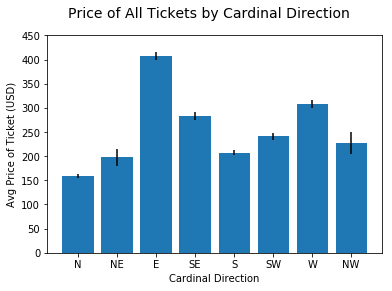

In [10]:
# Visualize ticket cost average
coords=range(8)

plt.bar(range(8),priceavgs['Price (USD)'],tick_label=compassindex,yerr=pricesems['Price (USD)'])
plt.ylabel('Avg Price of Ticket (USD)')
plt.ylim([0,450])
plt.xlabel('Cardinal Direction')
plt.suptitle('Price of All Tickets by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Price by Direction.png')

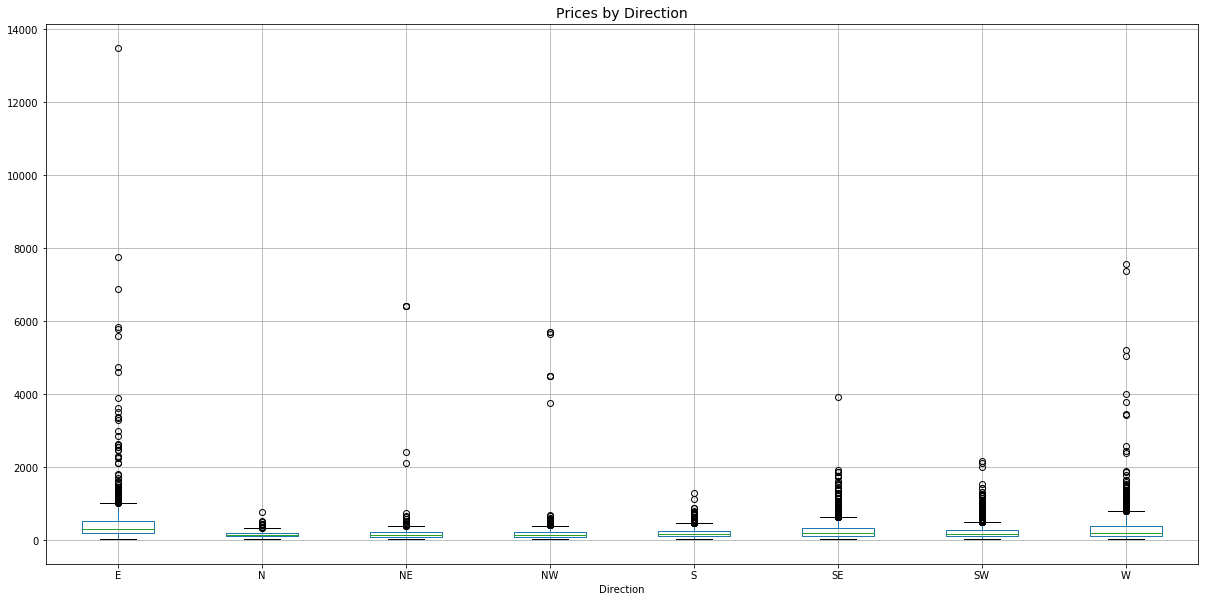

In [11]:
coordprices.boxplot('Price (USD)', by='Direction',figsize=(20,10))
plt.title('Prices by Direction',fontsize=14)
plt.suptitle("")

plt.savefig('Figures/All Prices by direction Boxplot.png')

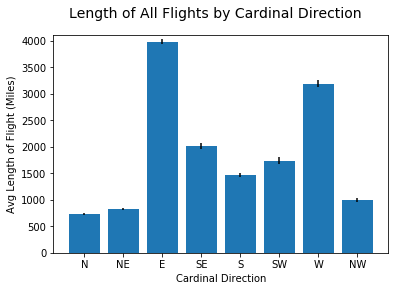

In [12]:
# Visualize Length of Flight by Direction
coords=range(8)

plt.bar(range(8),priceavgs['Distance (Miles)'],tick_label=compassindex,yerr=pricesems['Distance (Miles)'])
plt.ylabel('Avg Length of Flight (Miles)')
plt.xlabel('Cardinal Direction')
plt.ylim([0,4100])
plt.suptitle('Length of All Flights by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Flight Length by Direction.png')

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


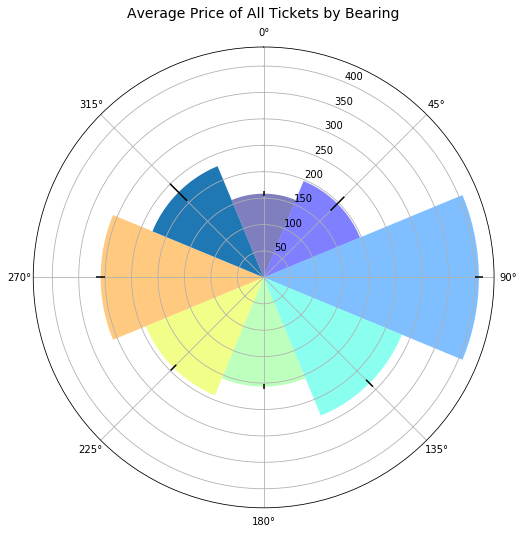

In [68]:
# Visualize all flight data in Polar Plot
fig=plt.figure(figsize=(8,8))
ax=fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
cardinalindex=range(7)
ax.set_title('Average Price of All Tickets by Bearing',fontsize=14)

theta=np.arange(0,2*math.pi,2*math.pi/8)
priceradii=list(priceavgs['Price (USD)'])
pricesem=list(pricesems['Price (USD)'])
# distanceradii=list(priceavgs['Distance (Miles)']/10)
pricewidth=math.pi/4
# distancewidth=math.pi/8
bars=ax.bar(theta,priceradii,width=pricewidth,bottom=0.0,yerr=pricesem)
# bars=ax.bar(theta,distanceradii,width=distancewidth,bottom=0.0)
for ci,bar in zip(cardinalindex,bars):
    bar.set_facecolor(cm.jet(ci/8.))
    bar.set_alpha(0.5)

plt.savefig('Figures/Average Price by Bearing.png',bbox_inches='tight')
fig.show()

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


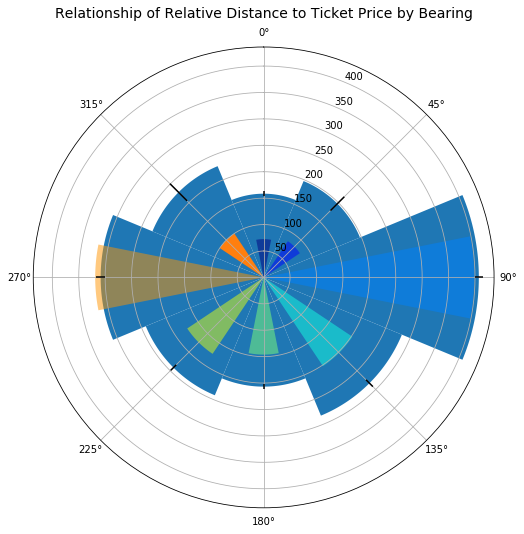

In [65]:
# Overlay Relative Distances onto visualization
fig=plt.figure(figsize=(8,8))
ax=fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
cardinalindex=range(7)
ax.set_title('Relationship of Relative Distance to Ticket Price by Bearing', fontsize=14)

theta=np.arange(0,2*math.pi,2*math.pi/8)
priceradii=list(priceavgs['Price (USD)'])
pricesem=list(pricesems['Price (USD)'])
distanceradii=list(priceavgs['Distance (Miles)']/10)
pricewidth=math.pi/4
distancewidth=math.pi/8
bars=ax.bar(theta,priceradii,width=pricewidth,bottom=0.0,yerr=pricesem)
bars=ax.bar(theta,distanceradii,width=distancewidth,bottom=0.0)
for ci,bar in zip(cardinalindex,bars):
    bar.set_facecolor(cm.jet(ci/8.))
    bar.set_alpha(0.5)

fig.show()

In [13]:
maxlength=coordprices['Distance (Miles)'].max()
coordprices[coordprices['Distance (Miles)']==maxlength]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2,Bearing,Direction
8958,MIA,DPS,2018-10-06T20:47:34,10899,2018-12-21,939.32,0,CheapTickets24.com,0.086184,25.7932,-80.290604,-8.74817,115.167,258.144401,W


In [14]:
maxprice=coordprices['Price (USD)'].max()
coordprices[coordprices['Price (USD)']==maxprice]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,Price per Mile,lat1,long1,lat2,long2,Bearing,Direction
4949,SFO,CBG,2018-10-03T16:29:28,5339,2018-12-17,13480.18,0,Justairticket,2.524851,37.618999,-122.375,52.205002,0.175,83.212539,E


In [15]:
# Extract individual groups
Ns = coordprices[coordprices["Direction"] == compassindex[0]]["Price (USD)"]
NEs = coordprices[coordprices["Direction"] == compassindex[1]]["Price (USD)"]
Es = coordprices[coordprices["Direction"] == compassindex[2]]["Price (USD)"]
SEs = coordprices[coordprices["Direction"] == compassindex[3]]["Price (USD)"]
Ss = coordprices[coordprices["Direction"] == compassindex[4]]["Price (USD)"]
SWs = coordprices[coordprices["Direction"] == compassindex[5]]["Price (USD)"]
Ws = coordprices[coordprices["Direction"] == compassindex[6]]["Price (USD)"]
NWs = coordprices[coordprices["Direction"] == compassindex[7]]["Price (USD)"]

In [31]:
# Perform the ANOVA
[_,pvalue]=stats.f_oneway(Ns,NEs,Es,SEs,Ss,SWs,Ws,NWs)
pvalue

1.7897132010688435e-86

In [17]:
# Trim coordinatedata to domestic flights
domairports_df=airportcodes_df[airportcodes_df['iso_country']=='US']
domairports=list(domairports_df['iata_code'].dropna())
domcoords_df=coords_df
rows=len(coords_df)
for i in range(rows):
    row=domcoords_df.iloc[i,:]
    if row['Airport Code'] not in domairports:
        row['Lat']=float('nan')
        row['Long']=float('nan')
domcoords_df

,Airport Code,Lat,Long
0,ATL,33.63669967651367,-84.4281005859375
1,ORL,NaN,NaN
2,BWI,39.17539978,-76.66829681
3,FLL,26.072599411010742,-80.15270233154297
4,DFW,32.89680099487305,-97.03800201416016
5,HOU,29.64539909,-95.27890015
6,MIA,25.79319953918457,-80.29060363769531
7,CHI,NaN,NaN
8,RDU,35.877601623535156,-78.7874984741211
9,BOS,42.36429977,-71.00520325


In [18]:
# Add latitudes and longitudes to deomestic ticket data
rows=len(domprices_df)
lats1=[]
longs1=[]
lats2=[]
longs2=[]
for i in range(rows):
    row=domprices_df.iloc[i,:]
#   Add coordinates of origin city
    origin=row['Origin']
    print('Ticket '+ str(i))
    print(origin)
    origincoords=domcoords_df[domcoords_df['Airport Code']==origin]
    lat1=list(origincoords['Lat'])[0]
    long1=list(origincoords['Long'])[0]
    lats1.append(float(lat1))
    longs1.append(float(long1))
#   Add coordinates of destination city
    destination=row['Destination']
    print(destination)
    destinationcoords=domcoords_df[domcoords_df['Airport Code']==destination]
    lat2=list(destinationcoords['Lat'])[0]
    long2=list(destinationcoords['Long'])[0]
    lats2.append(float(lat2))
    longs2.append(float(long2))
domprices_df['lat1']=lats1
domprices_df['long1']=longs1
domprices_df['lat2']=lats2
domprices_df['long2']=longs2
domprices_df=domprices_df.drop(columns=['Unnamed: 0'])

Ticket 0
ATL
ORL
Ticket 1
ATL
BWI
Ticket 2
ATL
FLL
Ticket 3
ATL
DFW
Ticket 4
ATL
HOU
Ticket 5
ATL
MIA
Ticket 6
ATL
CHI
Ticket 7
ATL
RDU
Ticket 8
ATL
BOS
Ticket 9
ATL
TPA
Ticket 10
ATL
NYC
Ticket 11
ATL
PIT
Ticket 12
ATL
BNA
Ticket 13
ATL
DEN
Ticket 14
ATL
MSY
Ticket 15
ATL
RIC
Ticket 16
ATL
DTT
Ticket 17
ATL
COS
Ticket 18
ATL
LAS
Ticket 19
ATL
HOT
Ticket 20
ATL
LAX
Ticket 21
ATL
JAX
Ticket 22
ATL
MEM
Ticket 23
ATL
SJU
Ticket 24
ATL
AUS
Ticket 25
ATL
SEA
Ticket 26
ATL
ISP
Ticket 27
ATL
SAN
Ticket 28
ATL
WAS
Ticket 29
ATL
JAN
Ticket 30
ATL
GUA
Ticket 31
ATL
CVG
Ticket 32
ATL
ILM
Ticket 33
ATL
MEX
Ticket 34
ATL
CUN
Ticket 35
ATL
SNA
Ticket 36
ATL
GEG
Ticket 37
ATL
SDQ
Ticket 38
ATL
PNS
Ticket 39
ATL
KIN
Ticket 40
ATL
GDL
Ticket 41
ATL
LEX
Ticket 42
ATL
MKE
Ticket 43
ATL
BOG
Ticket 44
ATL
PHX
Ticket 45
ATL
MSP
Ticket 46
ATL
PAR
Ticket 47
ATL
VSA
Ticket 48
ATL
HNL
Ticket 49
ATL
PHF
Ticket 50
ATL
SLP
Ticket 51
ATL
QRO
Ticket 52
ATL
PHL
Ticket 53
ATL
BCN
Ticket 54
ATL
MDE
Ticket 55
ATL
NCL
Ti

AUS
Ticket 506
DEN
MKC
Ticket 507
DEN
SJC
Ticket 508
DEN
ICT
Ticket 509
DEN
SFO
Ticket 510
DEN
WAS
Ticket 511
DEN
SEA
Ticket 512
DEN
FSD
Ticket 513
DEN
TPA
Ticket 514
DEN
PHL
Ticket 515
DEN
ATL
Ticket 516
DEN
PHX
Ticket 517
DEN
RDU
Ticket 518
DEN
RIC
Ticket 519
DEN
OAK
Ticket 520
DEN
OKC
Ticket 521
DEN
MKE
Ticket 522
DEN
CHI
Ticket 523
DEN
BOS
Ticket 524
DEN
LAR
Ticket 525
DEN
AVP
Ticket 526
DEN
CMH
Ticket 527
DEN
CVG
Ticket 528
DEN
PIT
Ticket 529
DEN
HAR
Ticket 530
DEN
SAC
Ticket 531
DEN
SAN
Ticket 532
DEN
CAK
Ticket 533
DEN
MEX
Ticket 534
DEN
YYC
Ticket 535
DEN
CLT
Ticket 536
DEN
SJU
Ticket 537
DEN
IND
Ticket 538
DEN
SNA
Ticket 539
DEN
BGR
Ticket 540
DEN
SIT
Ticket 541
DEN
ANC
Ticket 542
DEN
YTO
Ticket 543
DEN
GDL
Ticket 544
DEN
CUN
Ticket 545
DEN
BFD
Ticket 546
DEN
FKL
Ticket 547
DEN
MGW
Ticket 548
DEN
AOO
Ticket 549
DEN
BJX
Ticket 550
DEN
GSP
Ticket 551
DEN
PWM
Ticket 552
DEN
LNS
Ticket 553
DEN
HGR
Ticket 554
DEN
SJD
Ticket 555
DEN
SJO
Ticket 556
DEN
DUJ
Ticket 557
DEN
JAC
Ticket 5

PHL
Ticket 1041
LAS
MSP
Ticket 1042
LAS
BUR
Ticket 1043
LAS
BJX
Ticket 1044
LAS
MIA
Ticket 1045
LAS
BNA
Ticket 1046
LAS
ISP
Ticket 1047
LAS
SNA
Ticket 1048
LAS
PTY
Ticket 1049
LAS
HAV
Ticket 1050
LAS
SJO
Ticket 1051
LAS
YWG
Ticket 1052
LAS
ACA
Ticket 1053
LAS
JAX
Ticket 1054
LAS
CLT
Ticket 1055
LAS
RDM
Ticket 1056
LAS
ATL
Ticket 1057
LAS
TPA
Ticket 1058
LAS
DLH
Ticket 1059
LAS
PIA
Ticket 1060
LAS
JAN
Ticket 1061
LAS
SDQ
Ticket 1062
LAS
FMY
Ticket 1063
LAS
HRL
Ticket 1064
LAS
MGW
Ticket 1065
LAS
QRO
Ticket 1066
LAS
ANC
Ticket 1067
LAS
MFE
Ticket 1068
LAS
AVP
Ticket 1069
LAS
YMQ
Ticket 1070
LAS
LNS
Ticket 1071
LAS
LON
Ticket 1072
LAS
LEX
Ticket 1073
LAS
BFD
Ticket 1074
LAS
FKL
Ticket 1075
LAS
AOO
Ticket 1076
LAS
DUJ
Ticket 1077
LAS
KOA
Ticket 1078
LAS
HGR
Ticket 1079
LAS
HNL
Ticket 1080
LAS
PUJ
Ticket 1081
LAS
TSR
Ticket 1082
LAS
HAR
Ticket 1083
LAS
KIV
Ticket 1084
LAS
MAD
Ticket 1085
LAS
SEL
Ticket 1086
LAS
SSM
Ticket 1087
LAS
MOW
Ticket 1088
LAS
FRA
Ticket 1089
LAS
IEV
Ticket 1090
LAS


LIS
Ticket 1497
EWR
TSE
Ticket 1498
EWR
ALC
Ticket 1499
EWR
GVA
Ticket 1500
EWR
ABQ
Ticket 1501
EWR
BER
Ticket 1502
EWR
LYS
Ticket 1503
EWR
CTG
Ticket 1504
EWR
BZN
Ticket 1505
EWR
MIL
Ticket 1506
EWR
MFR
Ticket 1507
EWR
BLI
Ticket 1508
EWR
ORN
Ticket 1509
EWR
IEV
Ticket 1510
EWR
STX
Ticket 1511
EWR
HEL
Ticket 1512
EWR
PSO
Ticket 1513
EWR
RNO
Ticket 1514
EWR
BZE
Ticket 1515
EWR
BEG
Ticket 1516
EWR
MOW
Ticket 1517
EWR
CTA
Ticket 1518
EWR
NAP
Ticket 1519
EWR
CUC
Ticket 1520
EWR
DTT
Ticket 1521
EWR
ROA
Ticket 1522
EWR
PNS
Ticket 1523
EWR
PSE
Ticket 1524
EWR
RTB
Ticket 1525
EWR
AGS
Ticket 1526
EWR
AGP
Ticket 1527
EWR
GGT
Ticket 1528
EWR
BUD
Ticket 1529
EWR
LED
Ticket 1530
EWR
IST
Ticket 1531
EWR
MFE
Ticket 1532
EWR
VCE
Ticket 1533
EWR
KIV
Ticket 1534
EWR
PRN
Ticket 1535
EWR
CPH
Ticket 1536
EWR
EDI
Ticket 1537
EWR
TLV
Ticket 1538
EWR
MTY
Ticket 1539
EWR
DXB
Ticket 1540
EWR
TBS
Ticket 1541
EWR
LIM
Ticket 1542
EWR
SLC
Ticket 1543
EWR
KOA
Ticket 1544
EWR
NTE
Ticket 1545
EWR
MSQ
Ticket 1546
EWR


Ticket 1935
BOS
JKT
Ticket 1936
BOS
HRB
Ticket 1937
BOS
BHZ
Ticket 1938
BOS
EVN
Ticket 1939
BOS
RIO
Ticket 1940
BOS
CAI
Ticket 1941
BOS
TYO
Ticket 1942
BOS
CAN
Ticket 1943
BOS
ENU
Ticket 1944
LGA
WAS
Ticket 1945
LGA
ORL
Ticket 1946
LGA
FLL
Ticket 1947
LGA
CHI
Ticket 1948
LGA
MIA
Ticket 1949
LGA
DFW
Ticket 1950
LGA
CVG
Ticket 1951
LGA
YTO
Ticket 1952
LGA
PIT
Ticket 1953
LGA
MYR
Ticket 1954
LGA
BOS
Ticket 1955
LGA
CLT
Ticket 1956
LGA
BTV
Ticket 1957
LGA
BWI
Ticket 1958
LGA
PBI
Ticket 1959
LGA
BUF
Ticket 1960
LGA
ATL
Ticket 1961
LGA
RDU
Ticket 1962
LGA
CAE
Ticket 1963
LGA
SBN
Ticket 1964
LGA
MSP
Ticket 1965
LGA
BDA
Ticket 1966
LGA
BQN
Ticket 1967
LGA
MKC
Ticket 1968
LGA
CMH
Ticket 1969
LGA
HOU
Ticket 1970
LGA
LAS
Ticket 1971
LGA
TPA
Ticket 1972
LGA
LAX
Ticket 1973
LGA
PHX
Ticket 1974
LGA
CUN
Ticket 1975
LGA
FMY
Ticket 1976
LGA
OAK
Ticket 1977
LGA
PTY
Ticket 1978
LGA
MHT
Ticket 1979
LGA
SAN
Ticket 1980
LGA
YYC
Ticket 1981
LGA
AUS
Ticket 1982
LGA
BOI
Ticket 1983
LGA
SJU
Ticket 1984
LGA
ONT


Ticket 2465
FLL
CCS
Ticket 2466
FLL
PVR
Ticket 2467
FLL
MAD
Ticket 2468
FLL
AMS
Ticket 2469
FLL
MBJ
Ticket 2470
FLL
LNS
Ticket 2471
FLL
SMR
Ticket 2472
FLL
ROM
Ticket 2473
FLL
SAP
Ticket 2474
FLL
IEV
Ticket 2475
FLL
DAY
Ticket 2476
FLL
GDL
Ticket 2477
FLL
MKE
Ticket 2478
FLL
BHM
Ticket 2479
FLL
FLL
Ticket 2480
FLL
ELP
Ticket 2481
FLL
YEA
Ticket 2482
FLL
HAR
Ticket 2483
FLL
JAN
Ticket 2484
FLL
TUS
Ticket 2485
FLL
MOW
Ticket 2486
FLL
CLT
Ticket 2487
FLL
LIM
Ticket 2488
FLL
BEG
Ticket 2489
FLL
MGA
Ticket 2490
FLL
HKG
Ticket 2491
FLL
HNL
Ticket 2492
FLL
BOG
Ticket 2493
FLL
VIE
Ticket 2494
FLL
ROV
Ticket 2495
FLL
DEL
Ticket 2496
FLL
RIO
Ticket 2497
FLL
WAW
Ticket 2498
FLL
SJP
Ticket 2499
FLL
BKK
Ticket 2500
FLL
LED
Ticket 2501
FLL
TSE
Ticket 2502
FLL
VRA
Ticket 2503
FLL
KGF
Ticket 2504
FLL
ALA
Ticket 2505
FLL
TYO
Ticket 2506
FLL
CAN
Ticket 2507
FLL
FRA
Ticket 2508
FLL
SAO
Ticket 2509
FLL
FLN
Ticket 2510
FLL
OVB
Ticket 2511
FLL
TPE
Ticket 2512
FLL
SEL
Ticket 2513
FLL
TGU
Ticket 2514
FLL
TLV


DTT
Ticket 2889
SAN
MIA
Ticket 2890
SAN
MMH
Ticket 2891
SAN
STO
Ticket 2892
SAN
OSL
Ticket 2893
SAN
BJS
Ticket 2894
SAN
MUC
Ticket 2895
SAN
FRA
Ticket 2896
SAN
CMI
Ticket 2897
SAN
SIN
Ticket 2898
SAN
CAE
Ticket 2899
SAN
TYO
Ticket 2900
SAN
JAC
Ticket 2901
SAN
SEL
Ticket 2902
SAN
TLV
Ticket 2903
SAN
MOW
Ticket 2904
SAN
DEL
Ticket 2905
SAN
ULN
Ticket 2906
SAN
SAO
Ticket 2907
SAN
VVO
Ticket 2908
TPA
DFW
Ticket 2909
TPA
CHI
Ticket 2910
TPA
PIT
Ticket 2911
TPA
ATL
Ticket 2912
TPA
HOU
Ticket 2913
TPA
BWI
Ticket 2914
TPA
MEM
Ticket 2915
TPA
PHL
Ticket 2916
TPA
BOS
Ticket 2917
TPA
FLL
Ticket 2918
TPA
BDL
Ticket 2919
TPA
DEN
Ticket 2920
TPA
DTT
Ticket 2921
TPA
NYC
Ticket 2922
TPA
WAS
Ticket 2923
TPA
CLE
Ticket 2924
TPA
TYS
Ticket 2925
TPA
LAS
Ticket 2926
TPA
MBJ
Ticket 2927
TPA
GCK
Ticket 2928
TPA
SJU
Ticket 2929
TPA
PTY
Ticket 2930
TPA
CVG
Ticket 2931
TPA
TUL
Ticket 2932
TPA
LAX
Ticket 2933
TPA
TLH
Ticket 2934
TPA
ISP
Ticket 2935
TPA
CHA
Ticket 2936
TPA
MIA
Ticket 2937
TPA
SAC
Ticket 2938
TPA


SMF
MKC
Ticket 3389
SMF
ORL
Ticket 3390
SMF
BUR
Ticket 3391
SMF
FLL
Ticket 3392
SMF
GDL
Ticket 3393
SMF
YTO
Ticket 3394
SMF
CMH
Ticket 3395
SMF
SXM
Ticket 3396
SMF
MIA
Ticket 3397
SMF
MSY
Ticket 3398
SMF
YOW
Ticket 3399
SMF
SDQ
Ticket 3400
SMF
HNL
Ticket 3401
SMF
ANC
Ticket 3402
SMF
MSP
Ticket 3403
SMF
ZCL
Ticket 3404
SMF
TYS
Ticket 3405
SMF
NYC
Ticket 3406
SMF
MEX
Ticket 3407
SMF
OKC
Ticket 3408
SMF
QRO
Ticket 3409
SMF
MOW
Ticket 3410
SMF
SDF
Ticket 3411
SMF
THR
Ticket 3412
SMF
MNL
Ticket 3413
HOU
MIA
Ticket 3414
HOU
LAX
Ticket 3415
HOU
RDU
Ticket 3416
HOU
BWI
Ticket 3417
HOU
ORL
Ticket 3418
HOU
FLL
Ticket 3419
HOU
DEN
Ticket 3420
HOU
DTT
Ticket 3421
HOU
CHI
Ticket 3422
HOU
FMY
Ticket 3423
HOU
ATL
Ticket 3424
HOU
FAY
Ticket 3425
HOU
NYC
Ticket 3426
HOU
BOS
Ticket 3427
HOU
CUN
Ticket 3428
HOU
SAP
Ticket 3429
HOU
DFW
Ticket 3430
HOU
LBB
Ticket 3431
HOU
BHM
Ticket 3432
HOU
LAS
Ticket 3433
HOU
MEM
Ticket 3434
HOU
MYR
Ticket 3435
HOU
SAL
Ticket 3436
HOU
SJU
Ticket 3437
HOU
PWM
Ticket 3438


Ticket 3873
DAL
GDL
Ticket 3874
DAL
MSP
Ticket 3875
DAL
SJC
Ticket 3876
DAL
SFO
Ticket 3877
DAL
PNS
Ticket 3878
DAL
SJU
Ticket 3879
DAL
JAN
Ticket 3880
DAL
LBE
Ticket 3881
DAL
EUG
Ticket 3882
DAL
YMQ
Ticket 3883
DAL
TYS
Ticket 3884
DAL
MZT
Ticket 3885
DAL
SNA
Ticket 3886
DAL
HAR
Ticket 3887
DAL
MTY
Ticket 3888
DAL
COS
Ticket 3889
DAL
SCE
Ticket 3890
DAL
SJO
Ticket 3891
DAL
SAV
Ticket 3892
DAL
HSV
Ticket 3893
DAL
BHM
Ticket 3894
DAL
MSN
Ticket 3895
DAL
PBI
Ticket 3896
DAL
BKG
Ticket 3897
DAL
YTO
Ticket 3898
DAL
FAT
Ticket 3899
DAL
ASE
Ticket 3900
DAL
BFL
Ticket 3901
DAL
SYX
Ticket 3902
DAL
BKK
Ticket 3903
DAL
BFS
Ticket 3904
DAL
TRC
Ticket 3905
DAL
BJX
Ticket 3906
DAL
REK
Ticket 3907
DAL
MNL
Ticket 3908
DAL
MOW
Ticket 3909
DAL
LON
Ticket 3910
DAL
FRA
Ticket 3911
DAL
CAS
Ticket 3912
DAL
FIH
Ticket 3913
DAL
BIS
Ticket 3914
DAL
BER
Ticket 3915
DAL
CPT
Ticket 3916
DAL
CEB
Ticket 3917
DAL
DUB
Ticket 3918
DAL
LOS
Ticket 3919
DAL
CUN
Ticket 3920
DAL
BOM
Ticket 3921
DAL
DXB
Ticket 3922
DAL
MPH


PPT
Ticket 4320
LAX
CAI
Ticket 4321
LAX
PPS
Ticket 4322
LAX
WNP
Ticket 4323
LAX
MLE
Ticket 4324
LAX
HYD
Ticket 4325
LAX
LAD
Ticket 4326
LAX
NBO
Ticket 4327
LAX
TJM
Ticket 4328
LAX
HRE
Ticket 4329
LAX
KBL
Ticket 4330
LAX
ZYL
Ticket 4331
LAX
CJB
Ticket 4332
LAX
REP
Ticket 4333
LAX
COK
Ticket 4334
LAX
BOB
Ticket 4335
LAX
TSV
Ticket 4336
LAX
JED
Ticket 4337
LAX
WLG
Ticket 4338
LAX
LOS
Ticket 4339
LAX
NOU
Ticket 4340
LAX
CCR
Ticket 4341
DFW
ATL
Ticket 4342
DFW
ELD
Ticket 4343
DFW
CHI
Ticket 4344
DFW
DEN
Ticket 4345
DFW
HOU
Ticket 4346
DFW
LAS
Ticket 4347
DFW
MEM
Ticket 4348
DFW
HOT
Ticket 4349
DFW
LAX
Ticket 4350
DFW
PHL
Ticket 4351
DFW
BWI
Ticket 4352
DFW
ORL
Ticket 4353
DFW
NYC
Ticket 4354
DFW
PHX
Ticket 4355
DFW
FLL
Ticket 4356
DFW
MSY
Ticket 4357
DFW
MKC
Ticket 4358
DFW
CUN
Ticket 4359
DFW
AUS
Ticket 4360
DFW
HRO
Ticket 4361
DFW
MSP
Ticket 4362
DFW
CLT
Ticket 4363
DFW
SEA
Ticket 4364
DFW
WAS
Ticket 4365
DFW
PIT
Ticket 4366
DFW
MOB
Ticket 4367
DFW
FYV
Ticket 4368
DFW
DSM
Ticket 4369
DFW


Ticket 4885
SFO
SDQ
Ticket 4886
SFO
HGR
Ticket 4887
SFO
BDL
Ticket 4888
SFO
HOU
Ticket 4889
SFO
BNA
Ticket 4890
SFO
SJO
Ticket 4891
SFO
BOG
Ticket 4892
SFO
WUH
Ticket 4893
SFO
BFD
Ticket 4894
SFO
FKL
Ticket 4895
SFO
AOO
Ticket 4896
SFO
DUJ
Ticket 4897
SFO
MGW
Ticket 4898
SFO
PNH
Ticket 4899
SFO
KTM
Ticket 4900
SFO
LNS
Ticket 4901
SFO
TPE
Ticket 4902
SFO
SAL
Ticket 4903
SFO
CSL
Ticket 4904
SFO
PUJ
Ticket 4905
SFO
LON
Ticket 4906
SFO
MID
Ticket 4907
SFO
RIO
Ticket 4908
SFO
MOW
Ticket 4909
SFO
HKG
Ticket 4910
SFO
BEG
Ticket 4911
SFO
PPT
Ticket 4912
SFO
BRU
Ticket 4913
SFO
HAN
Ticket 4914
SFO
VCE
Ticket 4915
SFO
MNL
Ticket 4916
SFO
SIA
Ticket 4917
SFO
TYO
Ticket 4918
SFO
KUF
Ticket 4919
SFO
SYD
Ticket 4920
SFO
SCL
Ticket 4921
SFO
CAI
Ticket 4922
SFO
DUB
Ticket 4923
SFO
DPS
Ticket 4924
SFO
SAO
Ticket 4925
SFO
LED
Ticket 4926
SFO
BOM
Ticket 4927
SFO
SSA
Ticket 4928
SFO
AMS
Ticket 4929
SFO
MEL
Ticket 4930
SFO
BNE
Ticket 4931
SFO
VVO
Ticket 4932
SFO
BLR
Ticket 4933
SFO
HYD
Ticket 4934
SFO
ISP


EWR
MEM
Ticket 5387
EWR
HAV
Ticket 5388
EWR
SJO
Ticket 5389
EWR
OAK
Ticket 5390
EWR
LON
Ticket 5391
EWR
SAN
Ticket 5392
EWR
YQB
Ticket 5393
EWR
MBJ
Ticket 5394
EWR
SRQ
Ticket 5395
EWR
MAF
Ticket 5396
EWR
SBA
Ticket 5397
EWR
LIT
Ticket 5398
EWR
DUB
Ticket 5399
EWR
BOG
Ticket 5400
EWR
KIN
Ticket 5401
EWR
POS
Ticket 5402
EWR
HAR
Ticket 5403
EWR
PAR
Ticket 5404
EWR
MSY
Ticket 5405
EWR
BRU
Ticket 5406
EWR
FRA
Ticket 5407
EWR
POP
Ticket 5408
EWR
FMY
Ticket 5409
EWR
AMS
Ticket 5410
EWR
LGB
Ticket 5411
EWR
RST
Ticket 5412
EWR
GYE
Ticket 5413
EWR
BUR
Ticket 5414
EWR
AXM
Ticket 5415
EWR
SAC
Ticket 5416
EWR
CAK
Ticket 5417
EWR
PVR
Ticket 5418
EWR
ATH
Ticket 5419
EWR
MAD
Ticket 5420
EWR
PSE
Ticket 5421
EWR
MUC
Ticket 5422
EWR
RNO
Ticket 5423
EWR
BER
Ticket 5424
EWR
POZ
Ticket 5425
EWR
MKC
Ticket 5426
EWR
BGI
Ticket 5427
EWR
WAW
Ticket 5428
EWR
MIL
Ticket 5429
EWR
PDX
Ticket 5430
EWR
SNA
Ticket 5431
EWR
PUJ
Ticket 5432
EWR
SAL
Ticket 5433
EWR
DUS
Ticket 5434
EWR
LIS
Ticket 5435
EWR
PRG
Ticket 5436


FLL
Ticket 5886
LGA
MYR
Ticket 5887
LGA
ATL
Ticket 5888
LGA
ORL
Ticket 5889
LGA
CHI
Ticket 5890
LGA
MIA
Ticket 5891
LGA
PWM
Ticket 5892
LGA
DFW
Ticket 5893
LGA
YMQ
Ticket 5894
LGA
CVG
Ticket 5895
LGA
CLT
Ticket 5896
LGA
YTO
Ticket 5897
LGA
WAS
Ticket 5898
LGA
RDU
Ticket 5899
LGA
DEN
Ticket 5900
LGA
DTT
Ticket 5901
LGA
TPA
Ticket 5902
LGA
BUF
Ticket 5903
LGA
BWI
Ticket 5904
LGA
BDA
Ticket 5905
LGA
PIT
Ticket 5906
LGA
PBI
Ticket 5907
LGA
MSP
Ticket 5908
LGA
CAE
Ticket 5909
LGA
BNA
Ticket 5910
LGA
PHL
Ticket 5911
LGA
ONT
Ticket 5912
LGA
CMH
Ticket 5913
LGA
GSP
Ticket 5914
LGA
HOU
Ticket 5915
LGA
GSO
Ticket 5916
LGA
SJU
Ticket 5917
LGA
LAX
Ticket 5918
LGA
IND
Ticket 5919
LGA
JAX
Ticket 5920
LGA
DSM
Ticket 5921
LGA
CUN
Ticket 5922
LGA
LAS
Ticket 5923
LGA
MDE
Ticket 5924
LGA
AUS
Ticket 5925
LGA
MEX
Ticket 5926
LGA
CLE
Ticket 5927
LGA
PAP
Ticket 5928
LGA
LIT
Ticket 5929
LGA
STL
Ticket 5930
LGA
YVR
Ticket 5931
LGA
SJO
Ticket 5932
LGA
STI
Ticket 5933
LGA
SBA
Ticket 5934
LGA
BOG
Ticket 5935
LGA


FLL
BFD
Ticket 6386
FLL
MGA
Ticket 6387
FLL
HGR
Ticket 6388
FLL
CLO
Ticket 6389
FLL
LNS
Ticket 6390
FLL
PVD
Ticket 6391
FLL
SEA
Ticket 6392
FLL
LON
Ticket 6393
FLL
CLT
Ticket 6394
FLL
TUL
Ticket 6395
FLL
CCS
Ticket 6396
FLL
GRI
Ticket 6397
FLL
GYE
Ticket 6398
FLL
MYR
Ticket 6399
FLL
DOM
Ticket 6400
FLL
GND
Ticket 6401
FLL
ALB
Ticket 6402
FLL
HAR
Ticket 6403
FLL
PHX
Ticket 6404
FLL
ABQ
Ticket 6405
FLL
STL
Ticket 6406
FLL
OSL
Ticket 6407
FLL
JAN
Ticket 6408
FLL
SJC
Ticket 6409
FLL
AMS
Ticket 6410
FLL
SAC
Ticket 6411
FLL
CPH
Ticket 6412
FLL
ROM
Ticket 6413
FLL
SJD
Ticket 6414
FLL
MOW
Ticket 6415
FLL
SCL
Ticket 6416
FLL
LIM
Ticket 6417
FLL
MTY
Ticket 6418
FLL
IST
Ticket 6419
FLL
CUR
Ticket 6420
FLL
HNL
Ticket 6421
FLL
ASE
Ticket 6422
FLL
ANU
Ticket 6423
FLL
HAM
Ticket 6424
FLL
LED
Ticket 6425
FLL
SBA
Ticket 6426
FLL
COK
Ticket 6427
FLL
TLV
Ticket 6428
FLL
PBI
Ticket 6429
FLL
EGE
Ticket 6430
FLL
MAD
Ticket 6431
FLL
MSQ
Ticket 6432
FLL
MRV
Ticket 6433
FLL
SAO
Ticket 6434
FLL
SSA
Ticket 6435


BIL
Ticket 6885
PDX
GRR
Ticket 6886
PDX
NYC
Ticket 6887
PDX
RDU
Ticket 6888
PDX
PIT
Ticket 6889
PDX
SYR
Ticket 6890
PDX
RNO
Ticket 6891
PDX
YVR
Ticket 6892
PDX
BTV
Ticket 6893
PDX
CHI
Ticket 6894
PDX
ONT
Ticket 6895
PDX
PHL
Ticket 6896
PDX
BJX
Ticket 6897
PDX
LGB
Ticket 6898
PDX
GDL
Ticket 6899
PDX
HOU
Ticket 6900
PDX
BIS
Ticket 6901
PDX
DFW
Ticket 6902
PDX
BLI
Ticket 6903
PDX
MDE
Ticket 6904
PDX
BCN
Ticket 6905
PDX
BKK
Ticket 6906
PDX
DEL
Ticket 6907
PDX
EAR
Ticket 6908
PDX
SGN
Ticket 6909
PDX
PRG
Ticket 6910
PDX
LIH
Ticket 6911
PDX
TUN
Ticket 6912
PDX
FRA
Ticket 6913
PDX
DIK
Ticket 6914
PDX
TYR
Ticket 6915
PDX
GLA
Ticket 6916
PDX
ISP
Ticket 6917
PDX
SYD
Ticket 6918
STL
JAX
Ticket 6919
STL
DEN
Ticket 6920
STL
DFW
Ticket 6921
STL
DTT
Ticket 6922
STL
LAS
Ticket 6923
STL
BNA
Ticket 6924
STL
ATL
Ticket 6925
STL
MSY
Ticket 6926
STL
BOS
Ticket 6927
STL
SAC
Ticket 6928
STL
PHX
Ticket 6929
STL
GRR
Ticket 6930
STL
NYC
Ticket 6931
STL
CTG
Ticket 6932
STL
MEM
Ticket 6933
STL
ORL
Ticket 6934
STL


Ticket 7381
HOU
PKC
Ticket 7382
HOU
AKL
Ticket 7383
HOU
PPS
Ticket 7384
HOU
BOM
Ticket 7385
HOU
CNX
Ticket 7386
HOU
HKT
Ticket 7387
HOU
ABJ
Ticket 7388
SNA
SFO
Ticket 7389
SNA
LAS
Ticket 7390
SNA
DEN
Ticket 7391
SNA
STL
Ticket 7392
SNA
PHX
Ticket 7393
SNA
OAK
Ticket 7394
SNA
DFW
Ticket 7395
SNA
SEA
Ticket 7396
SNA
FAT
Ticket 7397
SNA
WAS
Ticket 7398
SNA
BWI
Ticket 7399
SNA
NYC
Ticket 7400
SNA
PIT
Ticket 7401
SNA
PWM
Ticket 7402
SNA
SAT
Ticket 7403
SNA
LON
Ticket 7404
SNA
LCA
Ticket 7405
SNA
PFO
Ticket 7406
SJU
ORL
Ticket 7407
SJU
STX
Ticket 7408
SJU
FLL
Ticket 7409
SJU
PHL
Ticket 7410
SJU
SDQ
Ticket 7411
SJU
TPA
Ticket 7412
SJU
BDL
Ticket 7413
SJU
NYC
Ticket 7414
SJU
JAX
Ticket 7415
SJU
BUF
Ticket 7416
SJU
DFW
Ticket 7417
SJU
SAN
Ticket 7418
SJU
BOS
Ticket 7419
SJU
MIA
Ticket 7420
SJU
STI
Ticket 7421
SJU
MKC
Ticket 7422
SJU
CLT
Ticket 7423
SJU
BNA
Ticket 7424
SJU
LAS
Ticket 7425
SJU
LAX
Ticket 7426
SJU
PBI
Ticket 7427
SJU
YVR
Ticket 7428
SJU
AUS
Ticket 7429
SJU
ISP
Ticket 7430
SJU
WAS


SGF
Ticket 7884
ATL
HRO
Ticket 7885
ATL
SLU
Ticket 7886
ATL
BSB
Ticket 7887
ATL
ABV
Ticket 7888
ATL
TYO
Ticket 7889
ATL
IEV
Ticket 7890
ATL
PMW
Ticket 7891
ATL
EBB
Ticket 7892
ATL
VIE
Ticket 7893
ORD
HOU
Ticket 7894
ORD
BOS
Ticket 7895
ORD
ORL
Ticket 7896
ORD
FLL
Ticket 7897
ORD
NYC
Ticket 7898
ORD
LAS
Ticket 7899
ORD
BWI
Ticket 7900
ORD
SFO
Ticket 7901
ORD
PHL
Ticket 7902
ORD
CMH
Ticket 7903
ORD
DFW
Ticket 7904
ORD
LAX
Ticket 7905
ORD
OAK
Ticket 7906
ORD
MIA
Ticket 7907
ORD
MEX
Ticket 7908
ORD
DEN
Ticket 7909
ORD
ISP
Ticket 7910
ORD
BUF
Ticket 7911
ORD
ATL
Ticket 7912
ORD
MSY
Ticket 7913
ORD
PBI
Ticket 7914
ORD
SAN
Ticket 7915
ORD
SEA
Ticket 7916
ORD
MSP
Ticket 7917
ORD
MLB
Ticket 7918
ORD
SDF
Ticket 7919
ORD
ABQ
Ticket 7920
ORD
RDU
Ticket 7921
ORD
CLE
Ticket 7922
ORD
SNA
Ticket 7923
ORD
SJU
Ticket 7924
ORD
AUS
Ticket 7925
ORD
YTO
Ticket 7926
ORD
PDX
Ticket 7927
ORD
CLT
Ticket 7928
ORD
BNA
Ticket 7929
ORD
WAS
Ticket 7930
ORD
JAN
Ticket 7931
ORD
PHX
Ticket 7932
ORD
STI
Ticket 7933
ORD


JFK
AUA
Ticket 8384
JFK
ROM
Ticket 8385
JFK
BGI
Ticket 8386
JFK
TPA
Ticket 8387
JFK
PAR
Ticket 8388
JFK
SJC
Ticket 8389
JFK
SAP
Ticket 8390
JFK
WAW
Ticket 8391
JFK
DUB
Ticket 8392
JFK
CYB
Ticket 8393
JFK
IND
Ticket 8394
JFK
AGP
Ticket 8395
JFK
VNO
Ticket 8396
JFK
SAL
Ticket 8397
JFK
NCE
Ticket 8398
JFK
ANC
Ticket 8399
JFK
JNU
Ticket 8400
JFK
LIS
Ticket 8401
JFK
SJO
Ticket 8402
JFK
REK
Ticket 8403
JFK
ATW
Ticket 8404
JFK
BCN
Ticket 8405
JFK
MAD
Ticket 8406
JFK
ATH
Ticket 8407
JFK
KUT
Ticket 8408
JFK
BER
Ticket 8409
JFK
MIL
Ticket 8410
JFK
RIX
Ticket 8411
JFK
TLV
Ticket 8412
JFK
HEL
Ticket 8413
JFK
UIO
Ticket 8414
JFK
MOW
Ticket 8415
JFK
HAR
Ticket 8416
JFK
BHX
Ticket 8417
JFK
ILM
Ticket 8418
JFK
IST
Ticket 8419
JFK
AXM
Ticket 8420
JFK
IEV
Ticket 8421
JFK
FRA
Ticket 8422
JFK
LED
Ticket 8423
JFK
YQB
Ticket 8424
JFK
BRU
Ticket 8425
JFK
CTG
Ticket 8426
JFK
STR
Ticket 8427
JFK
VCE
Ticket 8428
JFK
BFD
Ticket 8429
JFK
JMK
Ticket 8430
JFK
BUR
Ticket 8431
JFK
MSQ
Ticket 8432
JFK
ALG
Ticket 8433


MEM
Ticket 8883
MIA
HAV
Ticket 8884
MIA
RIO
Ticket 8885
MIA
LIT
Ticket 8886
MIA
LAX
Ticket 8887
MIA
YMQ
Ticket 8888
MIA
SAN
Ticket 8889
MIA
PIT
Ticket 8890
MIA
SFO
Ticket 8891
MIA
VRA
Ticket 8892
MIA
ILM
Ticket 8893
MIA
PVD
Ticket 8894
MIA
SDQ
Ticket 8895
MIA
CCS
Ticket 8896
MIA
LAS
Ticket 8897
MIA
MTY
Ticket 8898
MIA
BWI
Ticket 8899
MIA
PUJ
Ticket 8900
MIA
AVL
Ticket 8901
MIA
SXM
Ticket 8902
MIA
SLC
Ticket 8903
MIA
UIO
Ticket 8904
MIA
CLE
Ticket 8905
MIA
OAK
Ticket 8906
MIA
SEA
Ticket 8907
MIA
PVR
Ticket 8908
MIA
CLO
Ticket 8909
MIA
BOG
Ticket 8910
MIA
LIS
Ticket 8911
MIA
MUC
Ticket 8912
MIA
MAD
Ticket 8913
MIA
HMO
Ticket 8914
MIA
LON
Ticket 8915
MIA
PEI
Ticket 8916
MIA
BLA
Ticket 8917
MIA
PAR
Ticket 8918
MIA
BRU
Ticket 8919
MIA
VLC
Ticket 8920
MIA
OSL
Ticket 8921
MIA
GUA
Ticket 8922
MIA
BCN
Ticket 8923
MIA
ATH
Ticket 8924
MIA
BER
Ticket 8925
MIA
TXK
Ticket 8926
MIA
MOW
Ticket 8927
MIA
LPA
Ticket 8928
MIA
IST
Ticket 8929
MIA
ROM
Ticket 8930
MIA
SAP
Ticket 8931
MIA
LED
Ticket 8932
MIA


SEA
LED
Ticket 9383
SEA
BOM
Ticket 9384
SEA
LWO
Ticket 9385
SEA
CAI
Ticket 9386
SEA
OMS
Ticket 9387
SEA
FUK
Ticket 9388
SEA
KGD
Ticket 9389
SEA
BLR
Ticket 9390
SEA
DEL
Ticket 9391
SEA
EBL
Ticket 9392
SEA
AKL
Ticket 9393
PHL
ORL
Ticket 9394
PHL
FLL
Ticket 9395
PHL
DFW
Ticket 9396
PHL
DEN
Ticket 9397
PHL
LAX
Ticket 9398
PHL
SJU
Ticket 9399
PHL
DTT
Ticket 9400
PHL
MIA
Ticket 9401
PHL
WAS
Ticket 9402
PHL
PIT
Ticket 9403
PHL
CHI
Ticket 9404
PHL
AUS
Ticket 9405
PHL
NYC
Ticket 9406
PHL
LAS
Ticket 9407
PHL
BWI
Ticket 9408
PHL
HOU
Ticket 9409
PHL
YTO
Ticket 9410
PHL
TPA
Ticket 9411
PHL
MSY
Ticket 9412
PHL
MYR
Ticket 9413
PHL
SFO
Ticket 9414
PHL
YMQ
Ticket 9415
PHL
HGR
Ticket 9416
PHL
ATL
Ticket 9417
PHL
OAK
Ticket 9418
PHL
BOS
Ticket 9419
PHL
PHX
Ticket 9420
PHL
HAR
Ticket 9421
PHL
FAY
Ticket 9422
PHL
PVD
Ticket 9423
PHL
MSP
Ticket 9424
PHL
BFD
Ticket 9425
PHL
SBN
Ticket 9426
PHL
BHM
Ticket 9427
PHL
MKE
Ticket 9428
PHL
GRB
Ticket 9429
PHL
MBJ
Ticket 9430
PHL
HYA
Ticket 9431
PHL
AVP
Ticket 9432


ORF
Ticket 9882
BWI
MSY
Ticket 9883
BWI
BTV
Ticket 9884
BWI
CRP
Ticket 9885
BWI
EVV
Ticket 9886
BWI
BJX
Ticket 9887
BWI
ALB
Ticket 9888
BWI
PGV
Ticket 9889
BWI
LEX
Ticket 9890
BWI
MFE
Ticket 9891
BWI
PNS
Ticket 9892
BWI
UBS
Ticket 9893
BWI
TUL
Ticket 9894
BWI
CKB
Ticket 9895
BWI
HSV
Ticket 9896
BWI
BRD
Ticket 9897
BWI
FWA
Ticket 9898
BWI
KUN
Ticket 9899
BWI
CID
Ticket 9900
BWI
LON
Ticket 9901
BWI
MOB
Ticket 9902
BWI
MGM
Ticket 9903
BWI
FNT
Ticket 9904
BWI
SCE
Ticket 9905
BWI
SJU
Ticket 9906
BWI
JMS
Ticket 9907
BWI
REK
Ticket 9908
BWI
VNO
Ticket 9909
BWI
SAO
Ticket 9910
BWI
RAK
Ticket 9911
BWI
TJM
Ticket 9912
BWI
DEL
Ticket 9913
BWI
BAL
Ticket 9914
FLL
AVL
Ticket 9915
FLL
CHI
Ticket 9916
FLL
MSY
Ticket 9917
FLL
BWI
Ticket 9918
FLL
BOS
Ticket 9919
FLL
NYC
Ticket 9920
FLL
PIT
Ticket 9921
FLL
TPA
Ticket 9922
FLL
BDL
Ticket 9923
FLL
ORL
Ticket 9924
FLL
ATL
Ticket 9925
FLL
HOU
Ticket 9926
FLL
DTT
Ticket 9927
FLL
PTY
Ticket 9928
FLL
RDU
Ticket 9929
FLL
SAN
Ticket 9930
FLL
DFW
Ticket 9931
FLL


TPA
HAV
Ticket 10382
TPA
VCE
Ticket 10383
TPA
LUL
Ticket 10384
TPA
HAR
Ticket 10385
TPA
IEV
Ticket 10386
TPA
MDE
Ticket 10387
TPA
LIS
Ticket 10388
TPA
BOM
Ticket 10389
TPA
DEL
Ticket 10390
TPA
OVB
Ticket 10391
TPA
HKG
Ticket 10392
TPA
HKT
Ticket 10393
PDX
SEA
Ticket 10394
PDX
PHX
Ticket 10395
PDX
LAX
Ticket 10396
PDX
BUR
Ticket 10397
PDX
LAS
Ticket 10398
PDX
SAN
Ticket 10399
PDX
SNA
Ticket 10400
PDX
OAK
Ticket 10401
PDX
YVR
Ticket 10402
PDX
CHI
Ticket 10403
PDX
STL
Ticket 10404
PDX
SAC
Ticket 10405
PDX
RDU
Ticket 10406
PDX
ATL
Ticket 10407
PDX
FAT
Ticket 10408
PDX
DFW
Ticket 10409
PDX
SFO
Ticket 10410
PDX
BUF
Ticket 10411
PDX
MSY
Ticket 10412
PDX
IDA
Ticket 10413
PDX
BJX
Ticket 10414
PDX
ONT
Ticket 10415
PDX
HNL
Ticket 10416
PDX
GDL
Ticket 10417
PDX
SBN
Ticket 10418
PDX
NYC
Ticket 10419
PDX
CLT
Ticket 10420
PDX
MID
Ticket 10421
PDX
MLM
Ticket 10422
PDX
VER
Ticket 10423
PDX
IEV
Ticket 10424
PDX
BCN
Ticket 10425
PDX
DUB
Ticket 10426
PDX
PNH
Ticket 10427
PDX
LWO
Ticket 10428
PDX
GLA
Ticke

ROC
Ticket 10881
SJU
BDL
Ticket 10882
SJU
BOS
Ticket 10883
SJU
SYR
Ticket 10884
SJU
TPA
Ticket 10885
SJU
HAV
Ticket 10886
SJU
MDE
Ticket 10887
SJU
PTY
Ticket 10888
SJU
CHI
Ticket 10889
SJU
SDF
Ticket 10890
SJU
MKE
Ticket 10891
SJU
LAS
Ticket 10892
SJU
CLT
Ticket 10893
SJU
SAT
Ticket 10894
SJU
MIA
Ticket 10895
SJU
SFO
Ticket 10896
SJU
LEX
Ticket 10897
SJU
BNA
Ticket 10898
SJU
ISP
Ticket 10899
SJU
BUF
Ticket 10900
SJU
CHS
Ticket 10901
SJU
DFW
Ticket 10902
SJU
YVR
Ticket 10903
SJU
SEA
Ticket 10904
SJU
AUS
Ticket 10905
SJU
DTT
Ticket 10906
SJU
RDU
Ticket 10907
SJU
DEN
Ticket 10908
SJU
OAK
Ticket 10909
SJU
PHX
Ticket 10910
SJU
NAS
Ticket 10911
SJU
MSP
Ticket 10912
SJU
OKC
Ticket 10913
SJU
SGF
Ticket 10914
SJU
CTG
Ticket 10915
SJU
REK
Ticket 10916
SJU
FRA
Ticket 10917
SJU
VCE
Ticket 10918
SJU
LIM
Ticket 10919
SJU
COS
Ticket 10920
SJU
BUE
Ticket 10921
SJU
MAD
Ticket 10922
SJU
SCL
Ticket 10923
SJU
OKA
Ticket 10924
SJU
MJV
Ticket 10925
SJU
SYD
Ticket 10926
AUS
CMH
Ticket 10927
AUS
CLT
Ticket 10

In [19]:
# Add bearing in radians to determine flight direction
# Drop flights where coordinates are not available
domcoordprices=domprices_df.dropna(axis='rows',how='any')
rows=len(domcoordprices)
rises=[]
runs=[]
bearings=[]
directions=[]
for i in range(rows):
    row=domcoordprices.iloc[i,:]
    rise=row['lat2']-row['lat1']
    rises.append(rise)
    run=row['long2']-row['long1']
#   Correct for longitude jump over Atlantic Ocean
    if run > 180:
        run=run - 360
    elif run < -180:
        run=run + 360
    runs.append(run)
    bearing=((math.pi/2 - math.atan2(rise,run))%(math.pi*2)*180/math.pi)
    bearings.append(bearing)
#   Convert Bearing into Cardinal Direction
    if bearing<=22.5 or bearing>=337.5:
        direction='N'
    elif bearing<67.5:
        direction='NE'
    elif bearing<=112.5:
        direction='E'
    elif bearing<157.5:
        direction='SE'
    elif bearing<=202.5:
        direction='S'
    elif bearing<247.5:
        direction='SW'
    elif bearing<=292.5:
        direction='W'
    else:
        direction='NW'
    directions.append(direction)
domcoordprices['Bearing']=bearings
domcoordprices['Direction']=directions

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
domcoordprices

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,lat1,long1,lat2,long2,Bearing,Direction
1,ATL,BWI,2018-10-02T15:48:55,577,2018-10-23,28.97,0,OneTravel,33.636700,-84.428101,39.175400,-76.668297,54.481966,NE
2,ATL,FLL,2018-10-01T23:19:24,585,2018-10-09,28.97,0,OneTravel,33.636700,-84.428101,26.072599,-80.152702,150.523897,SE
3,ATL,DFW,2018-10-01T16:08:11,718,2018-10-24,48.65,0,CompassFlights,33.636700,-84.428101,32.896801,-97.038002,266.641963,W
4,ATL,HOU,2018-10-02T22:09:02,702,2018-10-09,51.99,0,JustFly,33.636700,-84.428101,29.645399,-95.278900,249.804727,W
5,ATL,MIA,2018-10-01T13:16:48,604,2018-10-18,54.21,0,OneTravel,33.636700,-84.428101,25.793200,-80.290604,152.188064,SE
7,ATL,RDU,2018-10-02T20:50:17,349,2019-01-03,56.76,0,FlightNetwork,33.636700,-84.428101,35.877602,-78.787498,68.333034,E
8,ATL,BOS,2018-10-01T23:33:11,937,2018-10-28,61.09,0,CompassFlights,33.636700,-84.428101,42.364300,-71.005203,56.967981,NE
9,ATL,TPA,2018-10-03T00:14:18,417,2018-10-12,61.41,0,FlightNetwork,33.636700,-84.428101,27.975500,-82.533203,161.493751,S
11,ATL,PIT,2018-10-01T18:38:03,522,2018-10-11,68.01,0,Kiwi.com,33.636700,-84.428101,40.491501,-80.232903,31.466996,NE
12,ATL,BNA,2018-10-02T01:54:02,209,2018-12-30,70.47,0,MyHolidays,33.636700,-84.428101,36.124500,-86.678200,317.872133,NW


In [21]:
# Group data by directions
domdirectiongroup=domcoordprices.groupby('Direction')
compassindex=['N','NE','E','SE','S','SW','W','NW']
dompriceavgs=domdirectiongroup.mean()
dompricesems=domdirectiongroup.sem()
dompriceavgs=dompriceavgs.reindex(compassindex)
dompricesems=dompricesems.reindex(compassindex)
dompriceavgs

,Distance (Miles),Price (USD),Class,lat1,long1,lat2,long2,Bearing
Direction,,,,,,,,
N,685.923077,157.579260,0.0,31.081080,-88.390442,40.853718,-87.881654,142.759871
NE,789.137353,196.932647,0.0,32.961491,-91.879639,40.538987,-81.738319,50.536121
E,1409.240467,196.733362,0.0,36.319903,-108.623951,36.940121,-83.691883,89.181695
SE,743.748634,135.795082,0.0,39.713574,-100.706984,31.836119,-92.153898,134.275071
S,702.825688,135.962997,0.0,40.755884,-87.975418,31.110088,-87.958927,180.166638
SW,865.746914,151.057438,0.0,40.006352,-81.044880,31.481882,-91.453360,227.775704
W,1581.460115,186.433472,0.0,37.674859,-82.369276,36.687227,-110.444420,269.004072
NW,841.535332,236.969229,0.0,32.844369,-89.958299,40.924123,-101.327452,309.218522


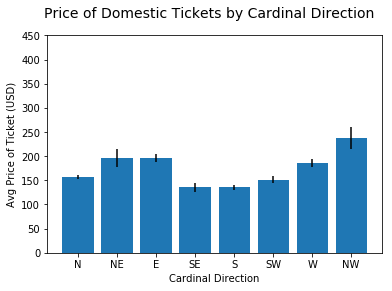

In [22]:
# Visualize ticket cost average
coords=range(8)

plt.bar(range(8),dompriceavgs['Price (USD)'],tick_label=compassindex,yerr=pricesems['Price (USD)'])
plt.ylabel('Avg Price of Ticket (USD)')
plt.ylim([0,450])
plt.xlabel('Cardinal Direction')
plt.suptitle('Price of Domestic Tickets by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Dom Price by Direction.png')

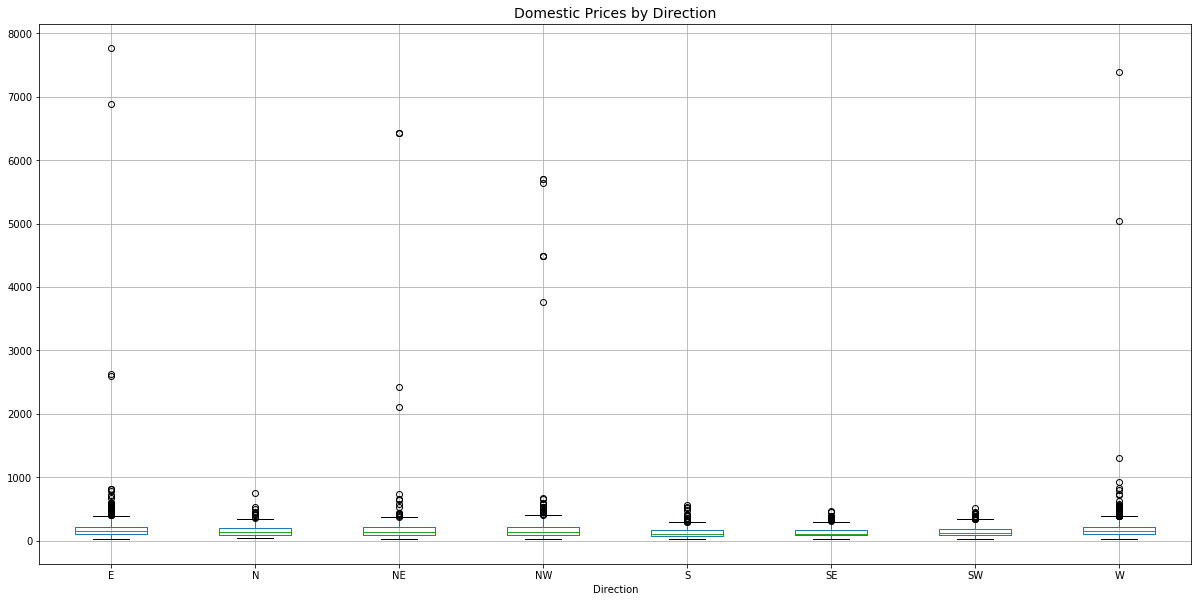

In [23]:
domcoordprices.boxplot('Price (USD)', by='Direction',figsize=(20,10))
plt.title('Domestic Prices by Direction',fontsize=14)
plt.suptitle("")

plt.savefig('Figures/Domestic Prices by direction Boxplot.png')

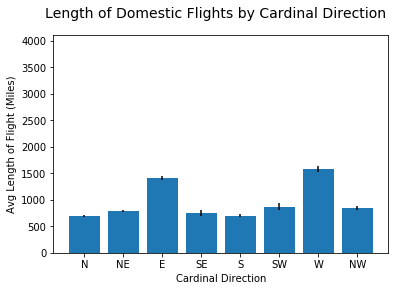

In [24]:
# Visualize Length of Domestic Flights by Direction
coords=range(8)

plt.bar(range(8),dompriceavgs['Distance (Miles)'],tick_label=compassindex,yerr=pricesems['Distance (Miles)'])
plt.ylabel('Avg Length of Flight (Miles)')
plt.ylim([0,4100])
plt.xlabel('Cardinal Direction')
plt.suptitle('Length of Domestic Flights by Cardinal Direction', fontsize=14)

plt.savefig('Figures/Avg Dom Flight Length by Direction.png')

In [25]:
maxlength=domcoordprices['Distance (Miles)'].max()
domcoordprices[domcoordprices['Distance (Miles)']==maxlength]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,lat1,long1,lat2,long2,Bearing,Direction
1931,BOS,HNL,2018-10-02T19:16:19,5088,2018-11-17,440.89,0,Kiwi.com,42.3643,-71.005203,21.32062,-157.924228,256.390189,W


In [26]:
maxprice=domcoordprices['Price (USD)'].max()
domcoordprices[domcoordprices['Price (USD)']==maxprice]

,Origin,Destination,Purchase Time,Distance (Miles),Departure Date,Price (USD),Class,Purchase Gate,lat1,long1,lat2,long2,Bearing,Direction
10314,MDW,JST,2018-10-06T05:45:40,470,2018-10-14,7762.39,0,JustFly,41.785999,-87.752403,40.316101,-78.8339,99.359036,E


In [27]:
# Extract individual groups for domestic flights
domNs = domcoordprices[domcoordprices["Direction"] == compassindex[0]]["Price (USD)"]
domNEs = domcoordprices[domcoordprices["Direction"] == compassindex[1]]["Price (USD)"]
domEs = domcoordprices[domcoordprices["Direction"] == compassindex[2]]["Price (USD)"]
domSEs = domcoordprices[domcoordprices["Direction"] == compassindex[3]]["Price (USD)"]
domSs = domcoordprices[domcoordprices["Direction"] == compassindex[4]]["Price (USD)"]
domSWs = domcoordprices[domcoordprices["Direction"] == compassindex[5]]["Price (USD)"]
domWs = domcoordprices[domcoordprices["Direction"] == compassindex[6]]["Price (USD)"]
domNWs = domcoordprices[domcoordprices["Direction"] == compassindex[7]]["Price (USD)"]

In [30]:
# Perform the ANOVA
[_,pvalue]=stats.f_oneway(domNs,domNEs,domEs,domSEs,domSs,domSWs,domWs,domNWs)
pvalue

2.5226034993202445e-07

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


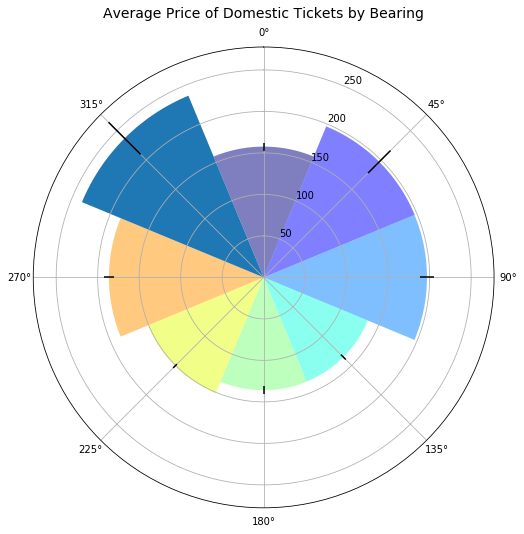

In [69]:
# Visualize domestic flight data in Polar Plot
fig=plt.figure(figsize=(8,8))
ax=fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
cardinalindex=range(7)
ax.set_title('Average Price of Domestic Tickets by Bearing',fontsize=14)

theta=np.arange(0,2*math.pi,2*math.pi/8)
priceradii=list(dompriceavgs['Price (USD)'])
pricesem=list(dompricesems['Price (USD)'])
# distanceradii=list(priceavgs['Distance (Miles)']/10)
pricewidth=math.pi/4
# distancewidth=math.pi/8
bars=ax.bar(theta,priceradii,width=pricewidth,bottom=0.0,yerr=pricesem)
# bars=ax.bar(theta,distanceradii,width=distancewidth,bottom=0.0)
for ci,bar in zip(cardinalindex,bars):
    bar.set_facecolor(cm.jet(ci/8.))
    bar.set_alpha(0.5)

plt.savefig('Figures/Average Domestic Price by Bearing.png',bbox_inches='tight')
fig.show()

C:\Users\OW93790\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


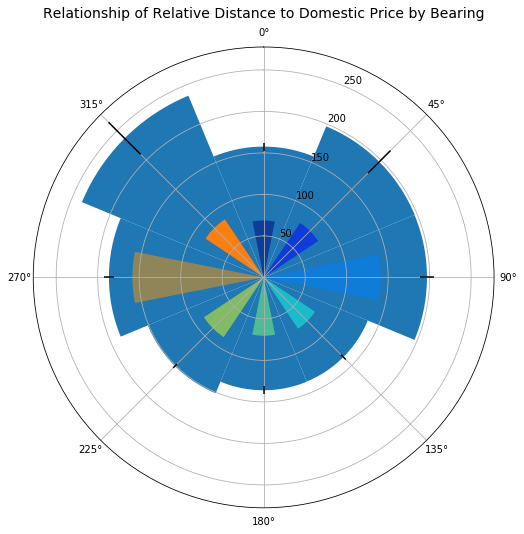

In [71]:
# Overlay Relative Distances onto visualization
fig=plt.figure(figsize=(8,8))
ax=fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
cardinalindex=range(7)
ax.set_title('Relationship of Relative Distance to Domestic Price by Bearing', fontsize=14)

theta=np.arange(0,2*math.pi,2*math.pi/8)
priceradii=list(dompriceavgs['Price (USD)'])
pricesem=list(dompricesems['Price (USD)'])
distanceradii=list(dompriceavgs['Distance (Miles)']/10)
pricewidth=math.pi/4
distancewidth=math.pi/8
bars=ax.bar(theta,priceradii,width=pricewidth,bottom=0.0,yerr=pricesem)
bars=ax.bar(theta,distanceradii,width=distancewidth,bottom=0.0)
for ci,bar in zip(cardinalindex,bars):
    bar.set_facecolor(cm.jet(ci/8.))
    bar.set_alpha(0.5)

plt.savefig('Figures/Flight Distance and Domestic Price by Bearing.png',bbox_inches='tight')
fig.show()